In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dask.dataframe as dd

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from collections import defaultdict
import glob
from collections import Counter
import os

import tqdm
import optuna
import warnings
warnings.filterwarnings('ignore')

# Отбор признаков по важности в модели

In [2]:
corr_features = ['feature_454', 'feature_103', 'feature_495', 'feature_388', 'feature_224', 'feature_428', 'feature_381', 'feature_208', 'feature_285', 'feature_178', 'feature_379', 'feature_410', 'feature_247', 'feature_141', 'feature_173','feature_434']

In [8]:
categorial_features = ['feature_17', 'feature_21', 'feature_22', 'feature_27', 'feature_31', 'feature_43', 'feature_61', 'feature_64', 'feature_80', 'feature_83', 'feature_92', 'feature_133', 'feature_143', 'feature_166', 'feature_191', 'feature_201', 'feature_209', 'feature_251', 'feature_253', 'feature_299', 'feature_300', 'feature_343', 'feature_347', 'feature_382', 'feature_392', 'feature_405', 'feature_406', 'feature_423', 'feature_446', 'feature_449', 'feature_459', 'feature_490', 'feature_492']

In [4]:
def get_train_val_test_split(df, y_col):
    X = df.drop(columns=[y_col])
    y = df[y_col]
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
    
    return X_train, X_val, X_test, y_train, y_val, y_test


def feature_importance_func(importance, names, model_name="", top_n=-1, skip_columns=[], plot=False):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df = fi_df[~fi_df['feature_names'].isin(skip_columns)]
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    if plot:
        plt.figure(figsize=(12,10))
        sns.barplot(x=fi_df['feature_importance'][:top_n], y=fi_df['feature_names'][:top_n])
        if top_n != -1:
            plt.title(f"{model_name} Feature Importance (Top: {top_n})")
        else:
            plt.title(f"{model_name} Feature Importance")
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature Names')
    
    lst_ = list(fi_df['feature_names'][:top_n])
    return lst_

In [14]:
train_best_params = []

for i in range(10):
    train_df = pd.read_csv(f"Files/Train/train_{i+1}.csv")
    col_for_drop = ['id', 'smpl'] + corr_features
    super_clean_df = train_df.drop(columns=col_for_drop).copy()
    
    super_clean_df[categorial_features] = super_clean_df[categorial_features].astype(str)
    new_train_df = super_clean_df.copy()
    
    
    study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps = 3), direction = "maximize")
    study.optimize(objective, n_trials = 10, timeout = 1800)

    best_params = study.best_params
    
    train_best_params.append(best_params)
    print("Best params:", i, best_params)

[I 2024-11-04 18:06:15,328] A new study created in memory with name: no-name-29d2884e-59d6-4a7b-a553-6438f2cec4fe


0:	learn: 0.6866405	test: 0.6866425	best: 0.6866425 (0)	total: 297ms	remaining: 32.4s
109:	learn: 0.2643572	test: 0.2644267	best: 0.2644267 (109)	total: 3.02s	remaining: 0us
bestTest = 0.2644267455
bestIteration = 109


[I 2024-11-04 18:06:44,335] Trial 0 finished with value: 0.7728144514816289 and parameters: {'learning_rate': 0.00292679700905271, 'l2_leaf_reg': 4.467651937257986, 'depth': 4, 'min_data_in_leaf': 5, 'iterations': 110}. Best is trial 0 with value: 0.7728144514816289.


0:	learn: 0.6858865	test: 0.6858872	best: 0.6858872 (0)	total: 295ms	remaining: 1m 7s
229:	learn: 0.1138422	test: 0.1140966	best: 0.1140966 (229)	total: 29.5s	remaining: 0us
bestTest = 0.1140966215
bestIteration = 229


[I 2024-11-04 18:07:37,677] Trial 1 finished with value: 0.7745872495799276 and parameters: {'learning_rate': 0.003170696959033146, 'l2_leaf_reg': 4.367327516760924, 'depth': 6, 'min_data_in_leaf': 1, 'iterations': 230}. Best is trial 1 with value: 0.7745872495799276.


0:	learn: 0.6906208	test: 0.6906220	best: 0.6906220 (0)	total: 321ms	remaining: 51s
159:	learn: 0.3959427	test: 0.3960150	best: 0.3960150 (159)	total: 5.07s	remaining: 0us
bestTest = 0.3960150248
bestIteration = 159


[I 2024-11-04 18:08:07,610] Trial 2 finished with value: 0.773165870942247 and parameters: {'learning_rate': 0.0011085669407544273, 'l2_leaf_reg': 6.135691701987032, 'depth': 6, 'min_data_in_leaf': 1, 'iterations': 160}. Best is trial 1 with value: 0.7745872495799276.


0:	learn: 0.6826440	test: 0.6826488	best: 0.6826488 (0)	total: 205ms	remaining: 32.5s
159:	learn: 0.1121692	test: 0.1124374	best: 0.1124374 (159)	total: 4.96s	remaining: 0us
bestTest = 0.1124373787
bestIteration = 159


[I 2024-11-04 18:08:37,624] Trial 3 finished with value: 0.7636491448981593 and parameters: {'learning_rate': 0.00462872117957209, 'l2_leaf_reg': 6.605851876319826, 'depth': 6, 'min_data_in_leaf': 2, 'iterations': 160}. Best is trial 1 with value: 0.7745872495799276.


0:	learn: 0.6739698	test: 0.6739763	best: 0.6739763 (0)	total: 202ms	remaining: 36.2s
179:	learn: 0.0633684	test: 0.0636192	best: 0.0636192 (179)	total: 4.44s	remaining: 0us
bestTest = 0.06361923566
bestIteration = 179


[I 2024-11-04 18:09:06,978] Trial 4 finished with value: 0.8123983743196576 and parameters: {'learning_rate': 0.008687963946078799, 'l2_leaf_reg': 4.3048553111232195, 'depth': 3, 'min_data_in_leaf': 3, 'iterations': 180}. Best is trial 4 with value: 0.8123983743196576.


0:	learn: 0.6756579	test: 0.6756661	best: 0.6756661 (0)	total: 184ms	remaining: 20s
109:	learn: 0.0970768	test: 0.0973229	best: 0.0973229 (109)	total: 3.04s	remaining: 0us
bestTest = 0.09732290739
bestIteration = 109


[I 2024-11-04 18:09:35,366] Trial 5 finished with value: 0.766342896842818 and parameters: {'learning_rate': 0.007777834853145225, 'l2_leaf_reg': 6.395571807270225, 'depth': 5, 'min_data_in_leaf': 5, 'iterations': 110}. Best is trial 4 with value: 0.8123983743196576.


0:	learn: 0.6852532	test: 0.6852539	best: 0.6852539 (0)	total: 370ms	remaining: 1m 13s
199:	learn: 0.1163502	test: 0.1164601	best: 0.1164601 (199)	total: 12s	remaining: 0us
bestTest = 0.1164601398
bestIteration = 199


[I 2024-11-04 18:10:11,869] Trial 6 finished with value: 0.7836264278916407 and parameters: {'learning_rate': 0.0036434251037562385, 'l2_leaf_reg': 5.065390624094081, 'depth': 3, 'min_data_in_leaf': 1, 'iterations': 200}. Best is trial 4 with value: 0.8123983743196576.


0:	learn: 0.6897290	test: 0.6897294	best: 0.6897294 (0)	total: 337ms	remaining: 1m 40s
299:	learn: 0.1850521	test: 0.1851160	best: 0.1851160 (299)	total: 18.2s	remaining: 0us
bestTest = 0.1851160392
bestIteration = 299


[I 2024-11-04 18:10:54,329] Trial 7 finished with value: 0.7771431302758042 and parameters: {'learning_rate': 0.001573951962427456, 'l2_leaf_reg': 4.550304029027937, 'depth': 3, 'min_data_in_leaf': 5, 'iterations': 300}. Best is trial 4 with value: 0.8123983743196576.


0:	learn: 0.6908202	test: 0.6908203	best: 0.6908203 (0)	total: 337ms	remaining: 1m 13s
219:	learn: 0.3458133	test: 0.3458755	best: 0.3458755 (219)	total: 28.5s	remaining: 0us
bestTest = 0.3458754506
bestIteration = 219


[I 2024-11-04 18:11:47,590] Trial 8 finished with value: 0.776109835282566 and parameters: {'learning_rate': 0.001013661555631699, 'l2_leaf_reg': 6.4610358763544244, 'depth': 6, 'min_data_in_leaf': 3, 'iterations': 220}. Best is trial 4 with value: 0.8123983743196576.


0:	learn: 0.6733967	test: 0.6734035	best: 0.6734035 (0)	total: 252ms	remaining: 42.5s
169:	learn: 0.0635915	test: 0.0639525	best: 0.0639525 (169)	total: 4.44s	remaining: 0us
bestTest = 0.06395249672
bestIteration = 169


[I 2024-11-04 18:12:17,323] Trial 9 finished with value: 0.8044990911370707 and parameters: {'learning_rate': 0.008947679274039139, 'l2_leaf_reg': 5.108160106808994, 'depth': 4, 'min_data_in_leaf': 4, 'iterations': 170}. Best is trial 4 with value: 0.8123983743196576.


Best params: 0 {'learning_rate': 0.008687963946078799, 'l2_leaf_reg': 4.3048553111232195, 'depth': 3, 'min_data_in_leaf': 3, 'iterations': 180}


[I 2024-11-04 18:13:09,949] A new study created in memory with name: no-name-770fdf9a-89e7-4f31-959f-285d0897d2a5


0:	learn: 0.6908304	test: 0.6908310	best: 0.6908310 (0)	total: 360ms	remaining: 46.4s
129:	learn: 0.4526579	test: 0.4527199	best: 0.4527199 (129)	total: 4.18s	remaining: 0us
bestTest = 0.4527198913
bestIteration = 129


[I 2024-11-04 18:13:42,695] Trial 0 finished with value: 0.7427362386647683 and parameters: {'learning_rate': 0.0011629946002556612, 'l2_leaf_reg': 4.189404056089733, 'depth': 6, 'min_data_in_leaf': 5, 'iterations': 130}. Best is trial 0 with value: 0.7427362386647683.


0:	learn: 0.6909502	test: 0.6909499	best: 0.6909499 (0)	total: 310ms	remaining: 1m 32s
299:	learn: 0.2880700	test: 0.2881423	best: 0.2881423 (299)	total: 18.1s	remaining: 0us
bestTest = 0.28814235
bestIteration = 299


[I 2024-11-04 18:14:25,771] Trial 1 finished with value: 0.7335578966117161 and parameters: {'learning_rate': 0.0011199288262134204, 'l2_leaf_reg': 7.473145203441857, 'depth': 3, 'min_data_in_leaf': 1, 'iterations': 300}. Best is trial 0 with value: 0.7427362386647683.


0:	learn: 0.6854128	test: 0.6854137	best: 0.6854137 (0)	total: 319ms	remaining: 1m 35s
299:	learn: 0.1002657	test: 0.1008316	best: 0.1008316 (299)	total: 39s	remaining: 0us
bestTest = 0.1008316494
bestIteration = 299


[I 2024-11-04 18:15:30,912] Trial 2 finished with value: 0.7803858343559611 and parameters: {'learning_rate': 0.0038343026957127413, 'l2_leaf_reg': 6.638160974994285, 'depth': 6, 'min_data_in_leaf': 1, 'iterations': 300}. Best is trial 2 with value: 0.7803858343559611.


0:	learn: 0.6902522	test: 0.6902523	best: 0.6902523 (0)	total: 301ms	remaining: 50.9s
169:	learn: 0.3530740	test: 0.3531681	best: 0.3531681 (169)	total: 5.33s	remaining: 0us
bestTest = 0.3531680597
bestIteration = 169


[I 2024-11-04 18:16:01,841] Trial 3 finished with value: 0.7470743413563581 and parameters: {'learning_rate': 0.0014538027515987664, 'l2_leaf_reg': 3.281726764940144, 'depth': 6, 'min_data_in_leaf': 5, 'iterations': 170}. Best is trial 2 with value: 0.7803858343559611.


0:	learn: 0.6882357	test: 0.6882344	best: 0.6882344 (0)	total: 397ms	remaining: 1m 58s
299:	learn: 0.1431908	test: 0.1433650	best: 0.1433650 (299)	total: 25.3s	remaining: 0us
bestTest = 0.1433650184
bestIteration = 299


[I 2024-11-04 18:16:51,719] Trial 4 finished with value: 0.7488977316673558 and parameters: {'learning_rate': 0.0024782046579094005, 'l2_leaf_reg': 4.078829838482037, 'depth': 4, 'min_data_in_leaf': 3, 'iterations': 300}. Best is trial 2 with value: 0.7803858343559611.


0:	learn: 0.6899828	test: 0.6899834	best: 0.6899834 (0)	total: 358ms	remaining: 1m 21s
229:	learn: 0.2718509	test: 0.2719811	best: 0.2719811 (229)	total: 24.6s	remaining: 0us
bestTest = 0.2719810833
bestIteration = 229


[I 2024-11-04 18:17:40,963] Trial 5 finished with value: 0.7426788473532578 and parameters: {'learning_rate': 0.0015652752616393101, 'l2_leaf_reg': 6.451891228618678, 'depth': 5, 'min_data_in_leaf': 3, 'iterations': 230}. Best is trial 2 with value: 0.7803858343559611.


0:	learn: 0.6836667	test: 0.6836680	best: 0.6836680 (0)	total: 281ms	remaining: 1m 1s
219:	learn: 0.1075798	test: 0.1080689	best: 0.1080689 (219)	total: 28.9s	remaining: 0us
bestTest = 0.1080689115
bestIteration = 219


[I 2024-11-04 18:18:34,533] Trial 6 finished with value: 0.7794706175287213 and parameters: {'learning_rate': 0.004704243236526998, 'l2_leaf_reg': 5.6908287541836735, 'depth': 6, 'min_data_in_leaf': 1, 'iterations': 220}. Best is trial 2 with value: 0.7803858343559611.


0:	learn: 0.6887714	test: 0.6887705	best: 0.6887705 (0)	total: 343ms	remaining: 1m 11s
209:	learn: 0.2204700	test: 0.2205790	best: 0.2205790 (209)	total: 17.8s	remaining: 0us
bestTest = 0.2205790132
bestIteration = 209


[I 2024-11-04 18:19:17,030] Trial 7 finished with value: 0.7426643726855081 and parameters: {'learning_rate': 0.002207208555835222, 'l2_leaf_reg': 7.263912112516794, 'depth': 4, 'min_data_in_leaf': 2, 'iterations': 210}. Best is trial 2 with value: 0.7803858343559611.


0:	learn: 0.6888980	test: 0.6888976	best: 0.6888976 (0)	total: 199ms	remaining: 25.7s
129:	learn: 0.3286316	test: 0.3286700	best: 0.3286700 (129)	total: 2.95s	remaining: 0us
bestTest = 0.3286699656
bestIteration = 129


[I 2024-11-04 18:19:45,388] Trial 8 finished with value: 0.7316018168722337 and parameters: {'learning_rate': 0.0021485198160246894, 'l2_leaf_reg': 3.9396357741396244, 'depth': 3, 'min_data_in_leaf': 5, 'iterations': 130}. Best is trial 2 with value: 0.7803858343559611.


0:	learn: 0.6903386	test: 0.6903385	best: 0.6903385 (0)	total: 200ms	remaining: 21.8s
109:	learn: 0.4488570	test: 0.4488809	best: 0.4488809 (109)	total: 3.18s	remaining: 0us
bestTest = 0.4488808839
bestIteration = 109


[I 2024-11-04 18:20:13,320] Trial 9 finished with value: 0.7261710707559365 and parameters: {'learning_rate': 0.001418961651697403, 'l2_leaf_reg': 6.310008212062815, 'depth': 3, 'min_data_in_leaf': 4, 'iterations': 110}. Best is trial 2 with value: 0.7803858343559611.


Best params: 1 {'learning_rate': 0.0038343026957127413, 'l2_leaf_reg': 6.638160974994285, 'depth': 6, 'min_data_in_leaf': 1, 'iterations': 300}


[I 2024-11-04 18:21:05,963] A new study created in memory with name: no-name-083541a5-7ba9-4989-93b5-74c6892eb140


0:	learn: 0.6799765	test: 0.6799718	best: 0.6799718 (0)	total: 302ms	remaining: 45s
149:	learn: 0.1110552	test: 0.1109800	best: 0.1109800 (149)	total: 4.95s	remaining: 0us
bestTest = 0.1109800051
bestIteration = 149


[I 2024-11-04 18:21:40,907] Trial 0 finished with value: 0.7619872349680874 and parameters: {'learning_rate': 0.006509871054878756, 'l2_leaf_reg': 5.637669737531683, 'depth': 6, 'min_data_in_leaf': 5, 'iterations': 150}. Best is trial 0 with value: 0.7619872349680874.


0:	learn: 0.6859327	test: 0.6859321	best: 0.6859321 (0)	total: 205ms	remaining: 22.4s
109:	learn: 0.2490774	test: 0.2489913	best: 0.2489913 (109)	total: 2.54s	remaining: 0us
bestTest = 0.2489913385
bestIteration = 109


[I 2024-11-04 18:22:08,272] Trial 1 finished with value: 0.7335588938972347 and parameters: {'learning_rate': 0.0036274792875356796, 'l2_leaf_reg': 7.659658682120027, 'depth': 3, 'min_data_in_leaf': 5, 'iterations': 110}. Best is trial 0 with value: 0.7619872349680874.


0:	learn: 0.6789444	test: 0.6789414	best: 0.6789414 (0)	total: 368ms	remaining: 1m 20s
219:	learn: 0.0854429	test: 0.0851293	best: 0.0851293 (219)	total: 18.6s	remaining: 0us
bestTest = 0.08512929422
bestIteration = 219


[I 2024-11-04 18:22:51,073] Trial 2 finished with value: 0.7754330885827213 and parameters: {'learning_rate': 0.007123626707392704, 'l2_leaf_reg': 5.499987592208939, 'depth': 4, 'min_data_in_leaf': 3, 'iterations': 220}. Best is trial 2 with value: 0.7754330885827213.


0:	learn: 0.6899697	test: 0.6899691	best: 0.6899691 (0)	total: 294ms	remaining: 1m 7s
229:	learn: 0.2675307	test: 0.2674655	best: 0.2674655 (229)	total: 18.9s	remaining: 0us
bestTest = 0.2674655175
bestIteration = 229


[I 2024-11-04 18:23:34,866] Trial 3 finished with value: 0.739363488408721 and parameters: {'learning_rate': 0.0015842229302321462, 'l2_leaf_reg': 3.648282976766144, 'depth': 4, 'min_data_in_leaf': 3, 'iterations': 230}. Best is trial 2 with value: 0.7754330885827213.


0:	learn: 0.6871750	test: 0.6871732	best: 0.6871732 (0)	total: 293ms	remaining: 52.5s
179:	learn: 0.1921459	test: 0.1920908	best: 0.1920908 (179)	total: 5.59s	remaining: 0us
bestTest = 0.1920908115
bestIteration = 179


[I 2024-11-04 18:24:05,719] Trial 4 finished with value: 0.7530735526838817 and parameters: {'learning_rate': 0.0029402679751006854, 'l2_leaf_reg': 7.545991382584164, 'depth': 6, 'min_data_in_leaf': 3, 'iterations': 180}. Best is trial 2 with value: 0.7754330885827213.


0:	learn: 0.6884826	test: 0.6884819	best: 0.6884819 (0)	total: 398ms	remaining: 1m 58s
299:	learn: 0.1494150	test: 0.1493067	best: 0.1493067 (299)	total: 25s	remaining: 0us
bestTest = 0.1493066852
bestIteration = 299


[I 2024-11-04 18:24:55,076] Trial 5 finished with value: 0.7512061380153451 and parameters: {'learning_rate': 0.0023273354375699163, 'l2_leaf_reg': 5.023994796993371, 'depth': 4, 'min_data_in_leaf': 4, 'iterations': 300}. Best is trial 2 with value: 0.7754330885827213.


0:	learn: 0.6775084	test: 0.6775052	best: 0.6775052 (0)	total: 370ms	remaining: 1m 24s
229:	learn: 0.0819178	test: 0.0815635	best: 0.0815635 (229)	total: 19.6s	remaining: 0us
bestTest = 0.08156348189
bestIteration = 229


[I 2024-11-04 18:25:38,946] Trial 6 finished with value: 0.7763569108922771 and parameters: {'learning_rate': 0.007850138443850841, 'l2_leaf_reg': 6.285208270762645, 'depth': 4, 'min_data_in_leaf': 3, 'iterations': 230}. Best is trial 6 with value: 0.7763569108922771.


0:	learn: 0.6840307	test: 0.6840285	best: 0.6840285 (0)	total: 361ms	remaining: 1m 11s
199:	learn: 0.1196527	test: 0.1195200	best: 0.1195200 (199)	total: 21.2s	remaining: 0us
bestTest = 0.1195200393
bestIteration = 199


[I 2024-11-04 18:26:24,431] Trial 7 finished with value: 0.7666181965454915 and parameters: {'learning_rate': 0.00445348924245782, 'l2_leaf_reg': 7.86995720778502, 'depth': 5, 'min_data_in_leaf': 1, 'iterations': 200}. Best is trial 6 with value: 0.7763569108922771.


0:	learn: 0.6856971	test: 0.6856968	best: 0.6856968 (0)	total: 188ms	remaining: 20.5s
109:	learn: 0.2423779	test: 0.2422898	best: 0.2422898 (109)	total: 2.67s	remaining: 0us
bestTest = 0.2422897776
bestIteration = 109


[I 2024-11-04 18:26:52,385] Trial 8 finished with value: 0.7342947657369142 and parameters: {'learning_rate': 0.003746316770470967, 'l2_leaf_reg': 5.340704267069174, 'depth': 3, 'min_data_in_leaf': 1, 'iterations': 110}. Best is trial 6 with value: 0.7763569108922771.


0:	learn: 0.6862897	test: 0.6862873	best: 0.6862873 (0)	total: 225ms	remaining: 26.8s
119:	learn: 0.2434303	test: 0.2433737	best: 0.2433737 (119)	total: 3.85s	remaining: 0us
bestTest = 0.2433737065
bestIteration = 119


[I 2024-11-04 18:27:21,170] Trial 9 finished with value: 0.74639019597549 and parameters: {'learning_rate': 0.003377597590735172, 'l2_leaf_reg': 4.573275156425971, 'depth': 6, 'min_data_in_leaf': 1, 'iterations': 120}. Best is trial 6 with value: 0.7763569108922771.


Best params: 2 {'learning_rate': 0.007850138443850841, 'l2_leaf_reg': 6.285208270762645, 'depth': 4, 'min_data_in_leaf': 3, 'iterations': 230}


[I 2024-11-04 18:28:15,278] A new study created in memory with name: no-name-7a001b3d-c201-41a2-a724-cb9c8d855426


0:	learn: 0.6835022	test: 0.6835094	best: 0.6835094 (0)	total: 245ms	remaining: 51.3s
209:	learn: 0.1204104	test: 0.1203569	best: 0.1203569 (209)	total: 12.8s	remaining: 0us
bestTest = 0.1203569189
bestIteration = 209


[I 2024-11-04 18:28:55,197] Trial 0 finished with value: 0.7621215376835055 and parameters: {'learning_rate': 0.005218025068286284, 'l2_leaf_reg': 5.105055136361827, 'depth': 3, 'min_data_in_leaf': 5, 'iterations': 210}. Best is trial 0 with value: 0.7621215376835055.


0:	learn: 0.6768021	test: 0.6768140	best: 0.6768140 (0)	total: 238ms	remaining: 35.4s
149:	learn: 0.1081875	test: 0.1082844	best: 0.1082844 (149)	total: 4.73s	remaining: 0us
bestTest = 0.1082843947
bestIteration = 149


[I 2024-11-04 18:29:25,129] Trial 1 finished with value: 0.7684888850173374 and parameters: {'learning_rate': 0.008646031271945843, 'l2_leaf_reg': 6.0042870079158375, 'depth': 6, 'min_data_in_leaf': 2, 'iterations': 150}. Best is trial 1 with value: 0.7684888850173374.


0:	learn: 0.6850565	test: 0.6850696	best: 0.6850696 (0)	total: 297ms	remaining: 1m 16s
259:	learn: 0.1185573	test: 0.1185266	best: 0.1185266 (259)	total: 28.2s	remaining: 0us
bestTest = 0.1185266444
bestIteration = 259


[I 2024-11-04 18:30:18,857] Trial 2 finished with value: 0.7733854057023116 and parameters: {'learning_rate': 0.004214262308007825, 'l2_leaf_reg': 6.31055956487366, 'depth': 5, 'min_data_in_leaf': 3, 'iterations': 260}. Best is trial 2 with value: 0.7733854057023116.


0:	learn: 0.6874775	test: 0.6874817	best: 0.6874817 (0)	total: 249ms	remaining: 24.7s
99:	learn: 0.3265524	test: 0.3267162	best: 0.3267162 (99)	total: 3.3s	remaining: 0us
bestTest = 0.3267161664
bestIteration = 99


[I 2024-11-04 18:30:49,130] Trial 3 finished with value: 0.7459610279937376 and parameters: {'learning_rate': 0.0029810338960038017, 'l2_leaf_reg': 4.420790852281171, 'depth': 6, 'min_data_in_leaf': 4, 'iterations': 100}. Best is trial 2 with value: 0.7733854057023116.


0:	learn: 0.6895160	test: 0.6895215	best: 0.6895215 (0)	total: 378ms	remaining: 1m 15s
199:	learn: 0.2777375	test: 0.2778533	best: 0.2778533 (199)	total: 23s	remaining: 0us
bestTest = 0.2778532675
bestIteration = 199


[I 2024-11-04 18:31:36,607] Trial 4 finished with value: 0.7449902606280141 and parameters: {'learning_rate': 0.0018869570246075132, 'l2_leaf_reg': 7.198741699376309, 'depth': 5, 'min_data_in_leaf': 1, 'iterations': 200}. Best is trial 2 with value: 0.7733854057023116.


0:	learn: 0.6744082	test: 0.6744381	best: 0.6744381 (0)	total: 408ms	remaining: 2m 2s
299:	learn: 0.0896219	test: 0.0896270	best: 0.0896270 (299)	total: 38.6s	remaining: 0us
bestTest = 0.08962699466
bestIteration = 299


[I 2024-11-04 18:32:40,802] Trial 5 finished with value: 0.785301968925959 and parameters: {'learning_rate': 0.009818224244385618, 'l2_leaf_reg': 6.089774228388593, 'depth': 6, 'min_data_in_leaf': 3, 'iterations': 300}. Best is trial 5 with value: 0.785301968925959.


0:	learn: 0.6857541	test: 0.6857584	best: 0.6857584 (0)	total: 306ms	remaining: 30.3s
99:	learn: 0.2700365	test: 0.2701559	best: 0.2701559 (99)	total: 3.04s	remaining: 0us
bestTest = 0.2701558977
bestIteration = 99


[I 2024-11-04 18:33:09,959] Trial 6 finished with value: 0.7461066951225709 and parameters: {'learning_rate': 0.003912609317364579, 'l2_leaf_reg': 6.150418963982371, 'depth': 5, 'min_data_in_leaf': 3, 'iterations': 100}. Best is trial 5 with value: 0.785301968925959.


0:	learn: 0.6905899	test: 0.6905919	best: 0.6905919 (0)	total: 318ms	remaining: 1m 35s
299:	learn: 0.2607326	test: 0.2608029	best: 0.2608029 (299)	total: 18.2s	remaining: 0us
bestTest = 0.2608029495
bestIteration = 299


[I 2024-11-04 18:33:53,754] Trial 7 finished with value: 0.7429007116395779 and parameters: {'learning_rate': 0.0013781292071089837, 'l2_leaf_reg': 6.553756059622434, 'depth': 3, 'min_data_in_leaf': 5, 'iterations': 300}. Best is trial 5 with value: 0.785301968925959.


0:	learn: 0.6912665	test: 0.6912681	best: 0.6912681 (0)	total: 253ms	remaining: 57.9s
229:	learn: 0.3817855	test: 0.3818600	best: 0.3818600 (229)	total: 14s	remaining: 0us
bestTest = 0.3818599683
bestIteration = 229


[I 2024-11-04 18:34:32,806] Trial 8 finished with value: 0.7318915433214527 and parameters: {'learning_rate': 0.0010131110198288165, 'l2_leaf_reg': 4.51390100560652, 'depth': 3, 'min_data_in_leaf': 5, 'iterations': 230}. Best is trial 5 with value: 0.785301968925959.


0:	learn: 0.6888786	test: 0.6888851	best: 0.6888851 (0)	total: 266ms	remaining: 1m 16s
289:	learn: 0.1791204	test: 0.1792074	best: 0.1792074 (289)	total: 30s	remaining: 0us
bestTest = 0.1792073522
bestIteration = 289


[I 2024-11-04 18:35:28,090] Trial 9 finished with value: 0.7587347285437402 and parameters: {'learning_rate': 0.002218908649136535, 'l2_leaf_reg': 6.662652813725206, 'depth': 5, 'min_data_in_leaf': 5, 'iterations': 290}. Best is trial 5 with value: 0.785301968925959.


Best params: 3 {'learning_rate': 0.009818224244385618, 'l2_leaf_reg': 6.089774228388593, 'depth': 6, 'min_data_in_leaf': 3, 'iterations': 300}


[I 2024-11-04 18:36:26,253] A new study created in memory with name: no-name-d6e5aaa6-a8c7-4d1d-b76e-6c0abd897bd7


0:	learn: 0.6844734	test: 0.6844690	best: 0.6844690 (0)	total: 207ms	remaining: 35.1s
169:	learn: 0.1683734	test: 0.1686384	best: 0.1686384 (169)	total: 5.07s	remaining: 0us
bestTest = 0.1686384472
bestIteration = 169


[I 2024-11-04 18:37:01,901] Trial 0 finished with value: 0.7689458949822712 and parameters: {'learning_rate': 0.00500938248410293, 'l2_leaf_reg': 3.565914180350364, 'depth': 6, 'min_data_in_leaf': 1, 'iterations': 170}. Best is trial 0 with value: 0.7689458949822712.


0:	learn: 0.6802010	test: 0.6801940	best: 0.6801940 (0)	total: 303ms	remaining: 48.2s
159:	learn: 0.1374022	test: 0.1376863	best: 0.1376863 (159)	total: 5.01s	remaining: 0us
bestTest = 0.1376863309
bestIteration = 159


[I 2024-11-04 18:37:33,998] Trial 1 finished with value: 0.7765816349898933 and parameters: {'learning_rate': 0.007496230767751017, 'l2_leaf_reg': 7.812786826132934, 'depth': 6, 'min_data_in_leaf': 1, 'iterations': 160}. Best is trial 1 with value: 0.7765816349898933.


0:	learn: 0.6903191	test: 0.6903207	best: 0.6903207 (0)	total: 315ms	remaining: 1m 15s
239:	learn: 0.3000019	test: 0.3001007	best: 0.3001007 (239)	total: 25.7s	remaining: 0us
bestTest = 0.3001006683
bestIteration = 239


[I 2024-11-04 18:38:25,248] Trial 2 finished with value: 0.7575952672512604 and parameters: {'learning_rate': 0.0016036155666964637, 'l2_leaf_reg': 6.692421568562207, 'depth': 5, 'min_data_in_leaf': 4, 'iterations': 240}. Best is trial 1 with value: 0.7765816349898933.


0:	learn: 0.6880964	test: 0.6880948	best: 0.6880948 (0)	total: 207ms	remaining: 26.7s
129:	learn: 0.2994447	test: 0.2994737	best: 0.2994737 (129)	total: 3.06s	remaining: 0us
bestTest = 0.2994737153
bestIteration = 129


[I 2024-11-04 18:38:54,178] Trial 3 finished with value: 0.7483659304657881 and parameters: {'learning_rate': 0.002999206190316557, 'l2_leaf_reg': 7.4520155261201655, 'depth': 3, 'min_data_in_leaf': 2, 'iterations': 130}. Best is trial 1 with value: 0.7765816349898933.


0:	learn: 0.6909255	test: 0.6909256	best: 0.6909256 (0)	total: 305ms	remaining: 1m 6s
219:	learn: 0.3592260	test: 0.3592723	best: 0.3592723 (219)	total: 13.5s	remaining: 0us
bestTest = 0.3592722875
bestIteration = 219


[I 2024-11-04 18:39:32,837] Trial 4 finished with value: 0.7470030896124438 and parameters: {'learning_rate': 0.001322140396285423, 'l2_leaf_reg': 6.0487184355982215, 'depth': 3, 'min_data_in_leaf': 2, 'iterations': 220}. Best is trial 1 with value: 0.7765816349898933.


0:	learn: 0.6815681	test: 0.6815632	best: 0.6815632 (0)	total: 276ms	remaining: 32.8s
119:	learn: 0.1750395	test: 0.1751661	best: 0.1751661 (119)	total: 4s	remaining: 0us
bestTest = 0.1751661167
bestIteration = 119


[I 2024-11-04 18:40:03,134] Trial 5 finished with value: 0.7649956243333158 and parameters: {'learning_rate': 0.006724001732108864, 'l2_leaf_reg': 4.038958788693851, 'depth': 5, 'min_data_in_leaf': 4, 'iterations': 120}. Best is trial 1 with value: 0.7765816349898933.


0:	learn: 0.6812049	test: 0.6812013	best: 0.6812013 (0)	total: 191ms	remaining: 24.6s
129:	learn: 0.1618686	test: 0.1619536	best: 0.1619536 (129)	total: 2.97s	remaining: 0us
bestTest = 0.1619535556
bestIteration = 129


[I 2024-11-04 18:40:32,243] Trial 6 finished with value: 0.7598588969920822 and parameters: {'learning_rate': 0.007119221925016272, 'l2_leaf_reg': 4.275816647904429, 'depth': 3, 'min_data_in_leaf': 2, 'iterations': 130}. Best is trial 1 with value: 0.7765816349898933.


0:	learn: 0.6888629	test: 0.6888625	best: 0.6888625 (0)	total: 243ms	remaining: 26.5s
109:	learn: 0.3657448	test: 0.3657724	best: 0.3657724 (109)	total: 2.86s	remaining: 0us
bestTest = 0.3657724467
bestIteration = 109


[I 2024-11-04 18:41:01,023] Trial 7 finished with value: 0.7501161521297456 and parameters: {'learning_rate': 0.0025413501697669942, 'l2_leaf_reg': 7.563083635448929, 'depth': 4, 'min_data_in_leaf': 2, 'iterations': 110}. Best is trial 1 with value: 0.7765816349898933.


0:	learn: 0.6908671	test: 0.6908663	best: 0.6908663 (0)	total: 189ms	remaining: 24.4s
129:	learn: 0.4564225	test: 0.4564375	best: 0.4564375 (129)	total: 3.04s	remaining: 0us
bestTest = 0.4564374617
bestIteration = 129


[I 2024-11-04 18:41:29,363] Trial 8 finished with value: 0.7390932403007255 and parameters: {'learning_rate': 0.0013519161082752758, 'l2_leaf_reg': 6.731637881035745, 'depth': 3, 'min_data_in_leaf': 1, 'iterations': 130}. Best is trial 1 with value: 0.7765816349898933.


0:	learn: 0.6815466	test: 0.6815402	best: 0.6815402 (0)	total: 256ms	remaining: 33.1s
129:	learn: 0.1656269	test: 0.1658558	best: 0.1658558 (129)	total: 4.2s	remaining: 0us
bestTest = 0.1658557715
bestIteration = 129


[I 2024-11-04 18:42:00,420] Trial 9 finished with value: 0.7675333453743385 and parameters: {'learning_rate': 0.006711664285103804, 'l2_leaf_reg': 6.247515549933533, 'depth': 6, 'min_data_in_leaf': 4, 'iterations': 130}. Best is trial 1 with value: 0.7765816349898933.


Best params: 4 {'learning_rate': 0.007496230767751017, 'l2_leaf_reg': 7.812786826132934, 'depth': 6, 'min_data_in_leaf': 1, 'iterations': 160}


[I 2024-11-04 18:43:05,408] A new study created in memory with name: no-name-2a2bbb67-4694-48cf-af80-2a24fa7e0821


0:	learn: 0.6842804	test: 0.6842734	best: 0.6842734 (0)	total: 247ms	remaining: 29.4s
119:	learn: 0.2401296	test: 0.2396617	best: 0.2396617 (119)	total: 2.98s	remaining: 0us
bestTest = 0.2396616816
bestIteration = 119


[I 2024-11-04 18:43:37,341] Trial 0 finished with value: 0.788494236489679 and parameters: {'learning_rate': 0.006153276709328862, 'l2_leaf_reg': 6.2299527738203295, 'depth': 4, 'min_data_in_leaf': 2, 'iterations': 120}. Best is trial 0 with value: 0.788494236489679.


0:	learn: 0.6913186	test: 0.6913145	best: 0.6913145 (0)	total: 371ms	remaining: 1m 47s
289:	learn: 0.3599044	test: 0.3595661	best: 0.3595661 (289)	total: 29.9s	remaining: 0us
bestTest = 0.3595661153
bestIteration = 289


[I 2024-11-04 18:44:33,076] Trial 1 finished with value: 0.7984176713212132 and parameters: {'learning_rate': 0.0012311869227306339, 'l2_leaf_reg': 4.496773480424078, 'depth': 5, 'min_data_in_leaf': 1, 'iterations': 290}. Best is trial 1 with value: 0.7984176713212132.


0:	learn: 0.6897129	test: 0.6897118	best: 0.6897118 (0)	total: 343ms	remaining: 1m 8s
199:	learn: 0.3109960	test: 0.3106190	best: 0.3106190 (199)	total: 16.3s	remaining: 0us
bestTest = 0.3106189673
bestIteration = 199


[I 2024-11-04 18:45:16,068] Trial 2 finished with value: 0.7876486935749873 and parameters: {'learning_rate': 0.0023767171499460083, 'l2_leaf_reg': 7.397439472861571, 'depth': 4, 'min_data_in_leaf': 4, 'iterations': 200}. Best is trial 1 with value: 0.7984176713212132.


0:	learn: 0.6899070	test: 0.6899037	best: 0.6899037 (0)	total: 191ms	remaining: 28.4s
149:	learn: 0.3788608	test: 0.3786465	best: 0.3786465 (149)	total: 3.96s	remaining: 0us
bestTest = 0.3786464568
bestIteration = 149


[I 2024-11-04 18:45:45,958] Trial 3 finished with value: 0.765459721348179 and parameters: {'learning_rate': 0.0022530900847222628, 'l2_leaf_reg': 7.667989509974309, 'depth': 3, 'min_data_in_leaf': 2, 'iterations': 150}. Best is trial 1 with value: 0.7984176713212132.


0:	learn: 0.6797713	test: 0.6797398	best: 0.6797398 (0)	total: 304ms	remaining: 1m 15s
249:	learn: 0.1582540	test: 0.1574651	best: 0.1574651 (249)	total: 26.3s	remaining: 0us
bestTest = 0.1574650978
bestIteration = 249


[I 2024-11-04 18:46:37,238] Trial 4 finished with value: 0.8246659805872536 and parameters: {'learning_rate': 0.009071129347108003, 'l2_leaf_reg': 5.902681427593932, 'depth': 5, 'min_data_in_leaf': 4, 'iterations': 250}. Best is trial 4 with value: 0.8246659805872536.


0:	learn: 0.6828482	test: 0.6828259	best: 0.6828259 (0)	total: 295ms	remaining: 1m 13s
249:	learn: 0.1627704	test: 0.1620530	best: 0.1620530 (249)	total: 32.9s	remaining: 0us
bestTest = 0.1620530277
bestIteration = 249


[I 2024-11-04 18:47:35,476] Trial 5 finished with value: 0.8254342644674173 and parameters: {'learning_rate': 0.0069425016671784264, 'l2_leaf_reg': 4.797564261906269, 'depth': 6, 'min_data_in_leaf': 4, 'iterations': 250}. Best is trial 5 with value: 0.8254342644674173.


0:	learn: 0.6909840	test: 0.6909833	best: 0.6909833 (0)	total: 311ms	remaining: 1m 29s
289:	learn: 0.3279515	test: 0.3276129	best: 0.3276129 (289)	total: 24.1s	remaining: 0us
bestTest = 0.3276128946
bestIteration = 289


[I 2024-11-04 18:48:24,998] Trial 6 finished with value: 0.7849681028531761 and parameters: {'learning_rate': 0.0014959702464127577, 'l2_leaf_reg': 5.277897491748755, 'depth': 4, 'min_data_in_leaf': 5, 'iterations': 290}. Best is trial 5 with value: 0.8254342644674173.


0:	learn: 0.6839961	test: 0.6839868	best: 0.6839868 (0)	total: 197ms	remaining: 19.5s
99:	learn: 0.2653075	test: 0.2649487	best: 0.2649487 (99)	total: 2.28s	remaining: 0us
bestTest = 0.2649487025
bestIteration = 99


[I 2024-11-04 18:48:53,639] Trial 7 finished with value: 0.7717265261466398 and parameters: {'learning_rate': 0.006386305355884647, 'l2_leaf_reg': 7.05782958312476, 'depth': 3, 'min_data_in_leaf': 3, 'iterations': 100}. Best is trial 5 with value: 0.8254342644674173.


0:	learn: 0.6803988	test: 0.6803941	best: 0.6803941 (0)	total: 338ms	remaining: 1m 41s
299:	learn: 0.1580722	test: 0.1572397	best: 0.1572397 (299)	total: 24.7s	remaining: 0us
bestTest = 0.1572397087
bestIteration = 299


[I 2024-11-04 18:49:43,466] Trial 8 finished with value: 0.8218872917411852 and parameters: {'learning_rate': 0.008873519056162047, 'l2_leaf_reg': 7.161568735387163, 'depth': 4, 'min_data_in_leaf': 3, 'iterations': 300}. Best is trial 5 with value: 0.8254342644674173.


0:	learn: 0.6790494	test: 0.6790341	best: 0.6790341 (0)	total: 296ms	remaining: 29.3s
99:	learn: 0.2038940	test: 0.2032725	best: 0.2032725 (99)	total: 3.2s	remaining: 0us
bestTest = 0.2032725119
bestIteration = 99


[I 2024-11-04 18:50:11,690] Trial 9 finished with value: 0.8134671073349876 and parameters: {'learning_rate': 0.009468594409879297, 'l2_leaf_reg': 6.835125275560863, 'depth': 6, 'min_data_in_leaf': 4, 'iterations': 100}. Best is trial 5 with value: 0.8254342644674173.


Best params: 5 {'learning_rate': 0.0069425016671784264, 'l2_leaf_reg': 4.797564261906269, 'depth': 6, 'min_data_in_leaf': 4, 'iterations': 250}


[I 2024-11-04 18:51:07,533] A new study created in memory with name: no-name-a0f2b96c-d18d-4ec4-ad4d-dc4b7e82aa6a


0:	learn: 0.6900947	test: 0.6900971	best: 0.6900971 (0)	total: 234ms	remaining: 34.9s
149:	learn: 0.3855031	test: 0.3858904	best: 0.3858904 (149)	total: 3.98s	remaining: 0us
bestTest = 0.3858903519
bestIteration = 149


[I 2024-11-04 18:51:39,160] Trial 0 finished with value: 0.7856988487557104 and parameters: {'learning_rate': 0.002126902694322696, 'l2_leaf_reg': 5.976626633274181, 'depth': 5, 'min_data_in_leaf': 3, 'iterations': 150}. Best is trial 0 with value: 0.7856988487557104.


0:	learn: 0.6859504	test: 0.6859555	best: 0.6859555 (0)	total: 200ms	remaining: 19.8s
99:	learn: 0.3044339	test: 0.3049640	best: 0.3049640 (99)	total: 2.2s	remaining: 0us
bestTest = 0.3049639952
bestIteration = 99


[I 2024-11-04 18:52:08,819] Trial 1 finished with value: 0.7718178936298007 and parameters: {'learning_rate': 0.005145344128073701, 'l2_leaf_reg': 7.102523254231053, 'depth': 3, 'min_data_in_leaf': 3, 'iterations': 100}. Best is trial 0 with value: 0.7856988487557104.


0:	learn: 0.6904010	test: 0.6904030	best: 0.6904030 (0)	total: 401ms	remaining: 1m 43s
259:	learn: 0.3043238	test: 0.3049680	best: 0.3049680 (259)	total: 38.2s	remaining: 0us
bestTest = 0.3049680184
bestIteration = 259


[I 2024-11-04 18:53:12,664] Trial 2 finished with value: 0.810766333954484 and parameters: {'learning_rate': 0.0018498440562785049, 'l2_leaf_reg': 6.265962812504135, 'depth': 6, 'min_data_in_leaf': 1, 'iterations': 260}. Best is trial 2 with value: 0.810766333954484.


0:	learn: 0.6877393	test: 0.6877460	best: 0.6877460 (0)	total: 331ms	remaining: 1m 29s
269:	learn: 0.2038505	test: 0.2048167	best: 0.2048167 (269)	total: 33.2s	remaining: 0us
bestTest = 0.2048166572
bestIteration = 269


[I 2024-11-04 18:54:15,515] Trial 3 finished with value: 0.8113912559925782 and parameters: {'learning_rate': 0.0036689952321827405, 'l2_leaf_reg': 5.661583788402078, 'depth': 5, 'min_data_in_leaf': 3, 'iterations': 270}. Best is trial 3 with value: 0.8113912559925782.


0:	learn: 0.6913960	test: 0.6913972	best: 0.6913972 (0)	total: 214ms	remaining: 34s
159:	learn: 0.4759716	test: 0.4762557	best: 0.4762557 (159)	total: 4.23s	remaining: 0us
bestTest = 0.4762556891
bestIteration = 159


[I 2024-11-04 18:54:50,731] Trial 4 finished with value: 0.7636956387799467 and parameters: {'learning_rate': 0.0012479254963438306, 'l2_leaf_reg': 4.255801609865381, 'depth': 3, 'min_data_in_leaf': 2, 'iterations': 160}. Best is trial 3 with value: 0.8113912559925782.


0:	learn: 0.6906336	test: 0.6906354	best: 0.6906354 (0)	total: 193ms	remaining: 36.5s
189:	learn: 0.3806626	test: 0.3810658	best: 0.3810658 (189)	total: 4.31s	remaining: 0us
bestTest = 0.3810657569
bestIteration = 189


[I 2024-11-04 18:55:22,580] Trial 5 finished with value: 0.7699767961539581 and parameters: {'learning_rate': 0.001791889885778167, 'l2_leaf_reg': 6.253681225805472, 'depth': 3, 'min_data_in_leaf': 5, 'iterations': 190}. Best is trial 3 with value: 0.8113912559925782.


0:	learn: 0.6893094	test: 0.6893133	best: 0.6893133 (0)	total: 190ms	remaining: 22.6s
119:	learn: 0.3864974	test: 0.3868912	best: 0.3868912 (119)	total: 3.47s	remaining: 0us
bestTest = 0.3868912061
bestIteration = 119


[I 2024-11-04 18:55:52,941] Trial 6 finished with value: 0.7911587013705766 and parameters: {'learning_rate': 0.0026060393524097386, 'l2_leaf_reg': 6.94354322652488, 'depth': 6, 'min_data_in_leaf': 5, 'iterations': 120}. Best is trial 3 with value: 0.8113912559925782.


0:	learn: 0.6913594	test: 0.6913608	best: 0.6913608 (0)	total: 267ms	remaining: 39.7s
149:	learn: 0.4800818	test: 0.4803346	best: 0.4803346 (149)	total: 4.02s	remaining: 0us
bestTest = 0.4803345692
bestIteration = 149


[I 2024-11-04 18:56:22,440] Trial 7 finished with value: 0.7842495070162131 and parameters: {'learning_rate': 0.0012447081151505423, 'l2_leaf_reg': 6.028924726149247, 'depth': 5, 'min_data_in_leaf': 5, 'iterations': 150}. Best is trial 3 with value: 0.8113912559925782.


0:	learn: 0.6901742	test: 0.6901794	best: 0.6901794 (0)	total: 328ms	remaining: 1m 25s
259:	learn: 0.2921791	test: 0.2927134	best: 0.2927134 (259)	total: 15.3s	remaining: 0us
bestTest = 0.2927133715
bestIteration = 259


[I 2024-11-04 18:57:02,476] Trial 8 finished with value: 0.7746930863043775 and parameters: {'learning_rate': 0.002126384791279692, 'l2_leaf_reg': 6.383946560932172, 'depth': 3, 'min_data_in_leaf': 3, 'iterations': 260}. Best is trial 3 with value: 0.8113912559925782.


0:	learn: 0.6904544	test: 0.6904593	best: 0.6904593 (0)	total: 280ms	remaining: 1m 20s
289:	learn: 0.2905003	test: 0.2910368	best: 0.2910368 (289)	total: 16.7s	remaining: 0us
bestTest = 0.2910368069
bestIteration = 289


[I 2024-11-04 18:57:44,212] Trial 9 finished with value: 0.7750544196062887 and parameters: {'learning_rate': 0.0019255442572170742, 'l2_leaf_reg': 5.0321880443746325, 'depth': 3, 'min_data_in_leaf': 1, 'iterations': 290}. Best is trial 3 with value: 0.8113912559925782.


Best params: 6 {'learning_rate': 0.0036689952321827405, 'l2_leaf_reg': 5.661583788402078, 'depth': 5, 'min_data_in_leaf': 3, 'iterations': 270}


[I 2024-11-04 18:58:40,213] A new study created in memory with name: no-name-4fbfe73e-239b-4d3e-884c-5e775c1efe29


0:	learn: 0.6900708	test: 0.6900702	best: 0.6900702 (0)	total: 314ms	remaining: 1m 11s
229:	learn: 0.3007991	test: 0.3009143	best: 0.3009143 (229)	total: 13.4s	remaining: 0us
bestTest = 0.3009143
bestIteration = 229


[I 2024-11-04 18:59:20,420] Trial 0 finished with value: 0.772565265751911 and parameters: {'learning_rate': 0.0020757585840730257, 'l2_leaf_reg': 4.34697237857179, 'depth': 3, 'min_data_in_leaf': 5, 'iterations': 230}. Best is trial 0 with value: 0.772565265751911.


0:	learn: 0.6805083	test: 0.6805118	best: 0.6805118 (0)	total: 215ms	remaining: 21.3s
99:	learn: 0.2139611	test: 0.2141542	best: 0.2141542 (99)	total: 2.48s	remaining: 0us
bestTest = 0.2141542301
bestIteration = 99


[I 2024-11-04 18:59:48,512] Trial 1 finished with value: 0.7759387164899927 and parameters: {'learning_rate': 0.008427660461219554, 'l2_leaf_reg': 4.7942280340679275, 'depth': 3, 'min_data_in_leaf': 1, 'iterations': 100}. Best is trial 1 with value: 0.7759387164899927.


0:	learn: 0.6877510	test: 0.6877544	best: 0.6877544 (0)	total: 237ms	remaining: 44.8s
189:	learn: 0.2393057	test: 0.2396387	best: 0.2396387 (189)	total: 6.04s	remaining: 0us
bestTest = 0.2396386512
bestIteration = 189


[I 2024-11-04 19:00:19,087] Trial 2 finished with value: 0.7947731683778447 and parameters: {'learning_rate': 0.003461991128988951, 'l2_leaf_reg': 7.823537655887079, 'depth': 6, 'min_data_in_leaf': 3, 'iterations': 190}. Best is trial 2 with value: 0.7947731683778447.


0:	learn: 0.6904277	test: 0.6904276	best: 0.6904276 (0)	total: 381ms	remaining: 1m 31s
239:	learn: 0.3162861	test: 0.3165197	best: 0.3165197 (239)	total: 25.1s	remaining: 0us
bestTest = 0.3165197057
bestIteration = 239


[I 2024-11-04 19:01:08,866] Trial 3 finished with value: 0.7963498528810388 and parameters: {'learning_rate': 0.001765562673978358, 'l2_leaf_reg': 3.7347738075479304, 'depth': 5, 'min_data_in_leaf': 4, 'iterations': 240}. Best is trial 3 with value: 0.7963498528810388.


0:	learn: 0.6900297	test: 0.6900297	best: 0.6900297 (0)	total: 386ms	remaining: 1m 16s
199:	learn: 0.3227569	test: 0.3230540	best: 0.3230540 (199)	total: 25.2s	remaining: 0us
bestTest = 0.3230539864
bestIteration = 199


[I 2024-11-04 19:01:59,049] Trial 4 finished with value: 0.8057825047082502 and parameters: {'learning_rate': 0.002013577192150883, 'l2_leaf_reg': 7.137435819042196, 'depth': 6, 'min_data_in_leaf': 3, 'iterations': 200}. Best is trial 4 with value: 0.8057825047082502.


0:	learn: 0.6830181	test: 0.6830146	best: 0.6830146 (0)	total: 357ms	remaining: 1m 28s
249:	learn: 0.1583297	test: 0.1587202	best: 0.1587202 (249)	total: 20.8s	remaining: 0us
bestTest = 0.1587201997
bestIteration = 249


[I 2024-11-04 19:02:44,784] Trial 5 finished with value: 0.8138925249446614 and parameters: {'learning_rate': 0.006825159469822948, 'l2_leaf_reg': 4.5130562185531, 'depth': 4, 'min_data_in_leaf': 1, 'iterations': 250}. Best is trial 5 with value: 0.8138925249446614.


0:	learn: 0.6881846	test: 0.6881828	best: 0.6881828 (0)	total: 240ms	remaining: 47.7s
199:	learn: 0.2410389	test: 0.2412992	best: 0.2412992 (199)	total: 16s	remaining: 0us
bestTest = 0.2412992098
bestIteration = 199


[I 2024-11-04 19:03:25,234] Trial 6 finished with value: 0.7993141766959635 and parameters: {'learning_rate': 0.0033336200579305395, 'l2_leaf_reg': 7.506932941467673, 'depth': 4, 'min_data_in_leaf': 4, 'iterations': 200}. Best is trial 5 with value: 0.8138925249446614.


0:	learn: 0.6786482	test: 0.6786475	best: 0.6786475 (0)	total: 410ms	remaining: 1m 21s
199:	learn: 0.1523652	test: 0.1528312	best: 0.1528312 (199)	total: 20.5s	remaining: 0us
bestTest = 0.1528311505
bestIteration = 199


[I 2024-11-04 19:04:10,795] Trial 7 finished with value: 0.8203303707376954 and parameters: {'learning_rate': 0.009480729219172953, 'l2_leaf_reg': 4.9863193201881275, 'depth': 5, 'min_data_in_leaf': 2, 'iterations': 200}. Best is trial 7 with value: 0.8203303707376954.


0:	learn: 0.6916108	test: 0.6916111	best: 0.6916111 (0)	total: 225ms	remaining: 31.3s
139:	learn: 0.5145267	test: 0.5146000	best: 0.5146000 (139)	total: 3.37s	remaining: 0us
bestTest = 0.5146000498
bestIteration = 139


[I 2024-11-04 19:04:39,908] Trial 8 finished with value: 0.777736613104913 and parameters: {'learning_rate': 0.0010114730062314825, 'l2_leaf_reg': 5.191408718335858, 'depth': 4, 'min_data_in_leaf': 5, 'iterations': 140}. Best is trial 7 with value: 0.8203303707376954.


0:	learn: 0.6848469	test: 0.6848467	best: 0.6848467 (0)	total: 319ms	remaining: 1m 32s
289:	learn: 0.1588205	test: 0.1592847	best: 0.1592847 (289)	total: 29.9s	remaining: 0us
bestTest = 0.159284727
bestIteration = 289


[I 2024-11-04 19:05:34,449] Trial 9 finished with value: 0.8181623942214277 and parameters: {'learning_rate': 0.005406949937796299, 'l2_leaf_reg': 4.971408172652905, 'depth': 5, 'min_data_in_leaf': 3, 'iterations': 290}. Best is trial 7 with value: 0.8203303707376954.


Best params: 7 {'learning_rate': 0.009480729219172953, 'l2_leaf_reg': 4.9863193201881275, 'depth': 5, 'min_data_in_leaf': 2, 'iterations': 200}


[I 2024-11-04 19:06:34,668] A new study created in memory with name: no-name-531ebe39-4f11-44eb-afbc-4ce0714097c6


0:	learn: 0.6865846	test: 0.6865904	best: 0.6865904 (0)	total: 271ms	remaining: 34.9s
129:	learn: 0.2770994	test: 0.2778451	best: 0.2778451 (129)	total: 3.22s	remaining: 0us
bestTest = 0.2778450688
bestIteration = 129


[I 2024-11-04 19:07:05,978] Trial 0 finished with value: 0.7824865988168266 and parameters: {'learning_rate': 0.0046109584924243, 'l2_leaf_reg': 3.4476812536046157, 'depth': 4, 'min_data_in_leaf': 2, 'iterations': 130}. Best is trial 0 with value: 0.7824865988168266.


0:	learn: 0.6894745	test: 0.6894847	best: 0.6894847 (0)	total: 392ms	remaining: 1m 57s
299:	learn: 0.2445480	test: 0.2453959	best: 0.2453959 (299)	total: 17.6s	remaining: 0us
bestTest = 0.2453958791
bestIteration = 299


[I 2024-11-04 19:07:49,735] Trial 1 finished with value: 0.7721588728146673 and parameters: {'learning_rate': 0.002577851641606786, 'l2_leaf_reg': 7.355654918242223, 'depth': 3, 'min_data_in_leaf': 5, 'iterations': 300}. Best is trial 0 with value: 0.7824865988168266.


0:	learn: 0.6811519	test: 0.6811636	best: 0.6811636 (0)	total: 299ms	remaining: 35.5s
119:	learn: 0.2094749	test: 0.2103909	best: 0.2103909 (119)	total: 3.32s	remaining: 0us
bestTest = 0.2103908816
bestIteration = 119


[I 2024-11-04 19:08:18,189] Trial 2 finished with value: 0.8002864171069403 and parameters: {'learning_rate': 0.008290708046689235, 'l2_leaf_reg': 7.009280686929128, 'depth': 5, 'min_data_in_leaf': 5, 'iterations': 120}. Best is trial 2 with value: 0.8002864171069403.


0:	learn: 0.6805535	test: 0.6805644	best: 0.6805644 (0)	total: 251ms	remaining: 42.4s
169:	learn: 0.1816758	test: 0.1826982	best: 0.1826982 (169)	total: 4.02s	remaining: 0us
bestTest = 0.1826982179
bestIteration = 169


[I 2024-11-04 19:08:47,836] Trial 3 finished with value: 0.8111582786035856 and parameters: {'learning_rate': 0.008882311643906352, 'l2_leaf_reg': 6.674577392137184, 'depth': 4, 'min_data_in_leaf': 3, 'iterations': 170}. Best is trial 3 with value: 0.8111582786035856.


0:	learn: 0.6874481	test: 0.6874630	best: 0.6874630 (0)	total: 383ms	remaining: 1m 27s
229:	learn: 0.2211049	test: 0.2219806	best: 0.2219806 (229)	total: 18.6s	remaining: 0us
bestTest = 0.2219806484
bestIteration = 229


[I 2024-11-04 19:09:31,575] Trial 4 finished with value: 0.8015463884448627 and parameters: {'learning_rate': 0.003923767259510581, 'l2_leaf_reg': 5.355303659201635, 'depth': 4, 'min_data_in_leaf': 1, 'iterations': 230}. Best is trial 3 with value: 0.8111582786035856.


0:	learn: 0.6803840	test: 0.6804194	best: 0.6804194 (0)	total: 320ms	remaining: 1m 32s
289:	learn: 0.1695806	test: 0.1707638	best: 0.1707638 (289)	total: 17.3s	remaining: 0us
bestTest = 0.1707637891
bestIteration = 289


[I 2024-11-04 19:10:13,139] Trial 5 finished with value: 0.8125882948991461 and parameters: {'learning_rate': 0.00900959747401492, 'l2_leaf_reg': 4.207663339530514, 'depth': 3, 'min_data_in_leaf': 3, 'iterations': 290}. Best is trial 5 with value: 0.8125882948991461.


0:	learn: 0.6912230	test: 0.6912282	best: 0.6912282 (0)	total: 364ms	remaining: 1m 23s
229:	learn: 0.3956791	test: 0.3962047	best: 0.3962047 (229)	total: 24.7s	remaining: 0us
bestTest = 0.3962046612
bestIteration = 229


[I 2024-11-04 19:11:02,800] Trial 6 finished with value: 0.7955196480719908 and parameters: {'learning_rate': 0.0013149672632711122, 'l2_leaf_reg': 3.7706887396535715, 'depth': 5, 'min_data_in_leaf': 1, 'iterations': 230}. Best is trial 5 with value: 0.8125882948991461.


0:	learn: 0.6913514	test: 0.6913555	best: 0.6913555 (0)	total: 353ms	remaining: 1m 13s
209:	learn: 0.4238274	test: 0.4243059	best: 0.4243059 (209)	total: 26.7s	remaining: 0us
bestTest = 0.4243058697
bestIteration = 209


[I 2024-11-04 19:11:54,229] Trial 7 finished with value: 0.8078500767143675 and parameters: {'learning_rate': 0.0012123042756357427, 'l2_leaf_reg': 6.609140502753313, 'depth': 6, 'min_data_in_leaf': 2, 'iterations': 210}. Best is trial 5 with value: 0.8125882948991461.


0:	learn: 0.6801052	test: 0.6801381	best: 0.6801381 (0)	total: 440ms	remaining: 1m 31s
209:	learn: 0.1702460	test: 0.1714024	best: 0.1714024 (209)	total: 22.1s	remaining: 0us
bestTest = 0.1714023659
bestIteration = 209


[I 2024-11-04 19:12:41,308] Trial 8 finished with value: 0.8205188701310733 and parameters: {'learning_rate': 0.008976153752913019, 'l2_leaf_reg': 4.2671550928728035, 'depth': 5, 'min_data_in_leaf': 5, 'iterations': 210}. Best is trial 8 with value: 0.8205188701310733.


0:	learn: 0.6900573	test: 0.6900653	best: 0.6900653 (0)	total: 254ms	remaining: 1m 10s
279:	learn: 0.2750876	test: 0.2758113	best: 0.2758113 (279)	total: 29s	remaining: 0us
bestTest = 0.2758113483
bestIteration = 279


[I 2024-11-04 19:13:35,242] Trial 9 finished with value: 0.8064816214457471 and parameters: {'learning_rate': 0.002113467592033474, 'l2_leaf_reg': 7.21002939607737, 'depth': 5, 'min_data_in_leaf': 5, 'iterations': 280}. Best is trial 8 with value: 0.8205188701310733.


Best params: 8 {'learning_rate': 0.008976153752913019, 'l2_leaf_reg': 4.2671550928728035, 'depth': 5, 'min_data_in_leaf': 5, 'iterations': 210}


[I 2024-11-04 19:14:32,756] A new study created in memory with name: no-name-0fb8deda-5566-4fcb-a1b8-5515182da239


0:	learn: 0.6862399	test: 0.6862324	best: 0.6862324 (0)	total: 383ms	remaining: 1m 54s
299:	learn: 0.1579381	test: 0.1568935	best: 0.1568935 (299)	total: 35.7s	remaining: 0us
bestTest = 0.1568935352
bestIteration = 299


[I 2024-11-04 19:15:36,666] Trial 0 finished with value: 0.823590610018311 and parameters: {'learning_rate': 0.0042308692123062454, 'l2_leaf_reg': 5.472964319926956, 'depth': 6, 'min_data_in_leaf': 1, 'iterations': 300}. Best is trial 0 with value: 0.823590610018311.


0:	learn: 0.6781092	test: 0.6781003	best: 0.6781003 (0)	total: 227ms	remaining: 36.1s
159:	learn: 0.1526945	test: 0.1513162	best: 0.1513162 (159)	total: 3.85s	remaining: 0us
bestTest = 0.1513161575
bestIteration = 159


[I 2024-11-04 19:16:05,543] Trial 1 finished with value: 0.815515187669236 and parameters: {'learning_rate': 0.009521466401602388, 'l2_leaf_reg': 7.732095940762913, 'depth': 4, 'min_data_in_leaf': 2, 'iterations': 160}. Best is trial 0 with value: 0.823590610018311.


0:	learn: 0.6908429	test: 0.6908402	best: 0.6908402 (0)	total: 357ms	remaining: 1m 43s
289:	learn: 0.3103870	test: 0.3098321	best: 0.3098321 (289)	total: 33.5s	remaining: 0us
bestTest = 0.3098320847
bestIteration = 289


[I 2024-11-04 19:17:03,224] Trial 2 finished with value: 0.816028988244441 and parameters: {'learning_rate': 0.0014077078277861933, 'l2_leaf_reg': 3.403949371796331, 'depth': 6, 'min_data_in_leaf': 2, 'iterations': 290}. Best is trial 0 with value: 0.823590610018311.


0:	learn: 0.6874059	test: 0.6874033	best: 0.6874033 (0)	total: 289ms	remaining: 54.6s
189:	learn: 0.2279696	test: 0.2269943	best: 0.2269943 (189)	total: 5.13s	remaining: 0us
bestTest = 0.2269942926
bestIteration = 189


[I 2024-11-04 19:17:33,861] Trial 3 finished with value: 0.8058972389712026 and parameters: {'learning_rate': 0.003537857790167383, 'l2_leaf_reg': 3.7476982186724164, 'depth': 5, 'min_data_in_leaf': 1, 'iterations': 190}. Best is trial 0 with value: 0.823590610018311.


0:	learn: 0.6907197	test: 0.6907172	best: 0.6907172 (0)	total: 198ms	remaining: 21.6s
109:	learn: 0.4829274	test: 0.4826451	best: 0.4826451 (109)	total: 2.42s	remaining: 0us
bestTest = 0.4826450893
bestIteration = 109


[I 2024-11-04 19:18:02,634] Trial 4 finished with value: 0.7648995635793683 and parameters: {'learning_rate': 0.0015395804193180298, 'l2_leaf_reg': 4.3819725722183085, 'depth': 3, 'min_data_in_leaf': 5, 'iterations': 110}. Best is trial 0 with value: 0.823590610018311.


0:	learn: 0.6909934	test: 0.6909912	best: 0.6909912 (0)	total: 274ms	remaining: 54.5s
199:	learn: 0.3964182	test: 0.3959967	best: 0.3959967 (199)	total: 15.3s	remaining: 0us
bestTest = 0.3959967135
bestIteration = 199


[I 2024-11-04 19:18:42,699] Trial 5 finished with value: 0.7894743642870328 and parameters: {'learning_rate': 0.0013517177129073019, 'l2_leaf_reg': 4.468354768994658, 'depth': 4, 'min_data_in_leaf': 5, 'iterations': 200}. Best is trial 0 with value: 0.823590610018311.


0:	learn: 0.6873365	test: 0.6873313	best: 0.6873313 (0)	total: 195ms	remaining: 36.9s
189:	learn: 0.2275467	test: 0.2264584	best: 0.2264584 (189)	total: 4.16s	remaining: 0us
bestTest = 0.2264583739
bestIteration = 189


[I 2024-11-04 19:19:12,463] Trial 6 finished with value: 0.7847694791001227 and parameters: {'learning_rate': 0.0036925869854579495, 'l2_leaf_reg': 7.220682707963491, 'depth': 3, 'min_data_in_leaf': 4, 'iterations': 190}. Best is trial 0 with value: 0.823590610018311.


0:	learn: 0.6829266	test: 0.6829207	best: 0.6829207 (0)	total: 231ms	remaining: 32.1s
139:	learn: 0.1925462	test: 0.1912980	best: 0.1912980 (139)	total: 3.51s	remaining: 0us
bestTest = 0.1912980137
bestIteration = 139


[I 2024-11-04 19:19:41,179] Trial 7 finished with value: 0.801796973551893 and parameters: {'learning_rate': 0.006452437338155928, 'l2_leaf_reg': 6.695439951227864, 'depth': 4, 'min_data_in_leaf': 3, 'iterations': 140}. Best is trial 0 with value: 0.823590610018311.


0:	learn: 0.6831501	test: 0.6831429	best: 0.6831429 (0)	total: 412ms	remaining: 1m 59s
289:	learn: 0.1441611	test: 0.1429029	best: 0.1429029 (289)	total: 28.3s	remaining: 0us
bestTest = 0.1429028883
bestIteration = 289


[I 2024-11-04 19:20:33,418] Trial 8 finished with value: 0.8208760269934438 and parameters: {'learning_rate': 0.006273408200593715, 'l2_leaf_reg': 3.856905295784677, 'depth': 5, 'min_data_in_leaf': 4, 'iterations': 290}. Best is trial 0 with value: 0.823590610018311.


0:	learn: 0.6830935	test: 0.6830860	best: 0.6830860 (0)	total: 354ms	remaining: 1m 35s
269:	learn: 0.1462090	test: 0.1449550	best: 0.1449550 (269)	total: 26.6s	remaining: 0us
bestTest = 0.1449549744
bestIteration = 269


[I 2024-11-04 19:21:24,821] Trial 9 finished with value: 0.8202836960788356 and parameters: {'learning_rate': 0.006309232546558802, 'l2_leaf_reg': 4.820138206392544, 'depth': 5, 'min_data_in_leaf': 2, 'iterations': 270}. Best is trial 0 with value: 0.823590610018311.


Best params: 9 {'learning_rate': 0.0042308692123062454, 'l2_leaf_reg': 5.472964319926956, 'depth': 6, 'min_data_in_leaf': 1, 'iterations': 300}


In [13]:
train_best_params = {'l2_leaf_reg': 6.638160974994285, 'depth': 6, 'iterations': 2000}

In [14]:
features_imp_list = []

for i in range(10):
    train_df = pd.read_csv(f"Files/Train/train_{i+1}.csv")
    col_for_drop = ['id', 'smpl'] + corr_features
    super_clean_df = train_df.drop(columns=col_for_drop).copy()
    
    super_clean_df[categorial_features] = super_clean_df[categorial_features].astype(str)
    new_train_df = super_clean_df.copy()
    
    X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test_split(new_train_df, 'target')
    
    best_params = train_best_params
    
    CatBoostModel = CatBoostClassifier(
            loss_function = 'Logloss',
            random_state = 42,
            task_type = 'GPU',
            verbose = 500,
            eval_metric='AUC',
#             grow_policy = 'Lossguide',
            **best_params
        )

    CatBoostModel.fit(
        X_train, y_train,
        eval_set=(X_val, y_val),
        cat_features=categorial_features,
        plot=False,
        verbose=500
                )

    y_pred_proba = CatBoostModel.predict_proba(X_test)[:, 1]

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(roc_auc)
    feat_imp = feature_importance_func(CatBoostModel.get_feature_importance(), X_test.columns, top_n=X_test.shape[1], plot=False)
    features_imp_list.append(feat_imp)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6669114	best: 0.6669114 (0)	total: 428ms	remaining: 14m 15s
500:	test: 0.8290815	best: 0.8290815 (500)	total: 1m 1s	remaining: 3m 4s
1000:	test: 0.8321442	best: 0.8322613 (990)	total: 2m 3s	remaining: 2m 3s
1500:	test: 0.8330256	best: 0.8331635 (1485)	total: 3m 5s	remaining: 1m 1s
1999:	test: 0.8339372	best: 0.8339372 (1999)	total: 4m 7s	remaining: 0us
bestTest = 0.8339371681
bestIteration = 1999
0.838948984419505


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6253106	best: 0.6253106 (0)	total: 449ms	remaining: 14m 58s
500:	test: 0.7691273	best: 0.7691273 (500)	total: 1m 5s	remaining: 3m 16s
1000:	test: 0.7732798	best: 0.7734652 (975)	total: 2m 9s	remaining: 2m 8s
1500:	test: 0.7749183	best: 0.7750162 (1435)	total: 3m 14s	remaining: 1m 4s
1999:	test: 0.7759180	best: 0.7759572 (1965)	total: 4m 17s	remaining: 0us
bestTest = 0.7759572268
bestIteration = 1965
Shrink model to first 1966 iterations.
0.8094483408658311


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6719352	best: 0.6719352 (0)	total: 442ms	remaining: 14m 44s
500:	test: 0.8177459	best: 0.8177885 (495)	total: 1m 6s	remaining: 3m 18s
1000:	test: 0.8209026	best: 0.8209026 (1000)	total: 2m 10s	remaining: 2m 10s
1500:	test: 0.8212366	best: 0.8214546 (1460)	total: 3m 12s	remaining: 1m 4s
1999:	test: 0.8207402	best: 0.8214546 (1460)	total: 4m 14s	remaining: 0us
bestTest = 0.8214546442
bestIteration = 1460
Shrink model to first 1461 iterations.
0.8056788341970855


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6604446	best: 0.6604446 (0)	total: 351ms	remaining: 11m 40s
500:	test: 0.8092291	best: 0.8092291 (500)	total: 1m 2s	remaining: 3m 6s
1000:	test: 0.8120152	best: 0.8120152 (1000)	total: 2m 3s	remaining: 2m 3s
1500:	test: 0.8132210	best: 0.8132342 (1495)	total: 3m 6s	remaining: 1m 1s
1999:	test: 0.8136327	best: 0.8136327 (1999)	total: 4m 6s	remaining: 0us
bestTest = 0.8136326969
bestIteration = 1999
0.794960498075113


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6767790	best: 0.6767790 (0)	total: 448ms	remaining: 14m 56s
500:	test: 0.7913220	best: 0.7913220 (500)	total: 1m 2s	remaining: 3m 8s
1000:	test: 0.7951030	best: 0.7951030 (1000)	total: 2m 5s	remaining: 2m 5s
1500:	test: 0.7960418	best: 0.7960650 (1480)	total: 3m 9s	remaining: 1m 2s
1999:	test: 0.7969571	best: 0.7969912 (1970)	total: 4m 11s	remaining: 0us
bestTest = 0.7969912291
bestIteration = 1970
Shrink model to first 1971 iterations.
0.8018421621554668


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7181931	best: 0.7181931 (0)	total: 449ms	remaining: 14m 56s
500:	test: 0.8559189	best: 0.8559189 (500)	total: 1m 4s	remaining: 3m 13s
1000:	test: 0.8587150	best: 0.8587150 (1000)	total: 2m 6s	remaining: 2m 6s
1500:	test: 0.8598257	best: 0.8598257 (1500)	total: 3m 9s	remaining: 1m 3s
1999:	test: 0.8603575	best: 0.8603575 (1999)	total: 4m 12s	remaining: 0us
bestTest = 0.860357523
bestIteration = 1999
0.8499989086787182


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7138457	best: 0.7138457 (0)	total: 354ms	remaining: 11m 48s
500:	test: 0.8441765	best: 0.8441765 (500)	total: 1m 2s	remaining: 3m 7s
1000:	test: 0.8473079	best: 0.8473194 (980)	total: 2m 3s	remaining: 2m 3s
1500:	test: 0.8486289	best: 0.8486289 (1500)	total: 3m 6s	remaining: 1m 1s
1999:	test: 0.8489270	best: 0.8489632 (1970)	total: 4m 7s	remaining: 0us
bestTest = 0.848963201
bestIteration = 1970
Shrink model to first 1971 iterations.
0.8495508939864087


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7309751	best: 0.7309751 (0)	total: 334ms	remaining: 11m 7s
500:	test: 0.8543552	best: 0.8543552 (500)	total: 1m 3s	remaining: 3m 9s
1000:	test: 0.8574033	best: 0.8574033 (1000)	total: 2m 5s	remaining: 2m 5s
1500:	test: 0.8588098	best: 0.8588098 (1500)	total: 3m 7s	remaining: 1m 2s
1999:	test: 0.8596923	best: 0.8596923 (1999)	total: 4m 14s	remaining: 0us
bestTest = 0.8596922755
bestIteration = 1999
0.8508398114978256


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7419727	best: 0.7419727 (0)	total: 323ms	remaining: 10m 44s
500:	test: 0.8557312	best: 0.8557312 (500)	total: 1m 6s	remaining: 3m 18s
1000:	test: 0.8581429	best: 0.8581429 (1000)	total: 2m 13s	remaining: 2m 13s
1500:	test: 0.8591862	best: 0.8591862 (1500)	total: 3m 18s	remaining: 1m 6s
1999:	test: 0.8598145	best: 0.8598474 (1985)	total: 4m 24s	remaining: 0us
bestTest = 0.8598474264
bestIteration = 1985
Shrink model to first 1986 iterations.
0.8484220298508717


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7468779	best: 0.7468779 (0)	total: 322ms	remaining: 10m 43s
500:	test: 0.8544328	best: 0.8544328 (500)	total: 1m 3s	remaining: 3m 8s
1000:	test: 0.8568386	best: 0.8568397 (990)	total: 2m 2s	remaining: 2m 2s
1500:	test: 0.8581967	best: 0.8582110 (1495)	total: 3m 1s	remaining: 1m
1999:	test: 0.8590710	best: 0.8590710 (1999)	total: 3m 59s	remaining: 0us
bestTest = 0.8590710461
bestIteration = 1999
0.85201687080279


In [15]:
feat_rank_list = []

feature_importance_counter = Counter()

for feat_imp in features_imp_list:
    for feature in feat_imp:
        feature_importance_counter[feature] += feat_imp.index(feature)

feature_ranking = feature_importance_counter.most_common()
feature_ranking_sorted = sorted(feature_ranking, key=lambda x: x[1])
print("Рейтинг лучших признаков по их общей важности:")
for feature, importance in feature_ranking_sorted:
    feat_rank_list.append(feature)
    print(f'{feature}: {importance:.2f}')

Рейтинг лучших признаков по их общей важности:
feature_80: 3.00
feature_47: 18.00
feature_421: 40.00
feature_48: 44.00
feature_383: 69.00
feature_424: 104.00
feature_234: 114.00
feature_353: 149.00
feature_244: 154.00
feature_35: 162.00
feature_131: 172.00
feature_11: 186.00
feature_462: 224.00
feature_239: 238.00
feature_98: 247.00
feature_467: 296.00
feature_195: 299.00
feature_100: 315.00
feature_365: 328.00
feature_164: 344.00
feature_166: 370.00
feature_154: 373.00
feature_390: 386.00
feature_230: 393.00
feature_133: 397.00
feature_157: 402.00
feature_439: 404.00
feature_50: 404.00
feature_45: 412.00
feature_332: 416.00
feature_212: 422.00
feature_119: 425.00
feature_153: 455.00
feature_490: 470.00
feature_371: 475.00
feature_81: 478.00
feature_201: 487.00
feature_139: 507.00
feature_452: 509.00
feature_53: 517.00
feature_51: 540.00
feature_42: 548.00
feature_223: 559.00
feature_364: 561.00
feature_197: 578.00
feature_114: 585.00
feature_251: 607.00
feature_87: 621.00
feature_451:

In [34]:
full_roc_auc = []
for i in range(10):
    train_df = pd.read_csv(f"Files/Train/train_{i+1}.csv")
    col_for_drop = ['id', 'smpl'] + corr_features
    super_clean_df = train_df.drop(columns=col_for_drop).copy()
    
    super_clean_df[categorial_features] = super_clean_df[categorial_features].astype(str)
    new_train_df = super_clean_df.copy()
    print(f'train: {i+1}')
    df_roc_auc = []
    for f in range(1, 80):
        new_train_df_imp_columns = new_train_df[feat_rank_list[:f] + ['target']]
        X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test_split(new_train_df_imp_columns, 'target')
        model_categorial_f = list(np.intersect1d(categorial_features, new_train_df_imp_columns.columns))
        best_params = train_best_params[0] # гип-ры первого train.csv

        CatBoostModel = CatBoostClassifier(
                loss_function = 'CrossEntropy',
                random_state = 42,
                task_type = 'GPU',
                verbose = False,
                **best_params
            )

        CatBoostModel.fit(
            X_train, y_train,
            eval_set=(X_val, y_val),
            cat_features=model_categorial_f,
            plot=False,
            verbose=1000
                    )

        y_pred_proba = CatBoostModel.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f, roc_auc)
        df_roc_auc.append(roc_auc)
        
    full_roc_auc.append(df_roc_auc)

train: 1
0:	learn: 0.6848924	test: 0.6848925	best: 0.6848925 (0)	total: 22.4ms	remaining: 4.01s
179:	learn: 0.1442525	test: 0.1442483	best: 0.1442483 (179)	total: 1.15s	remaining: 0us
bestTest = 0.1442482741
bestIteration = 179
1 0.5
0:	learn: 0.6848909	test: 0.6848915	best: 0.6848915 (0)	total: 8.9ms	remaining: 1.59s
179:	learn: 0.1437734	test: 0.1437661	best: 0.1437661 (179)	total: 1.2s	remaining: 0us
bestTest = 0.1437661474
bestIteration = 179
2 0.6391328142009648
0:	learn: 0.6848909	test: 0.6848915	best: 0.6848915 (0)	total: 7.46ms	remaining: 1.33s
179:	learn: 0.1435048	test: 0.1435269	best: 0.1435269 (179)	total: 1.27s	remaining: 0us
bestTest = 0.1435269271
bestIteration = 179
3 0.722413855042778
0:	learn: 0.6848903	test: 0.6848908	best: 0.6848908 (0)	total: 8.04ms	remaining: 1.44s
179:	learn: 0.1434043	test: 0.1434245	best: 0.1434245 (179)	total: 1.14s	remaining: 0us
bestTest = 0.1434245082
bestIteration = 179
4 0.74929783521263
0:	learn: 0.6848900	test: 0.6848911	best: 0.6848911

179:	learn: 0.0644519	test: 0.0646291	best: 0.0646291 (179)	total: 3.01s	remaining: 0us
bestTest = 0.0646291259
bestIteration = 179
35 0.7460417686384749
0:	learn: 0.6736644	test: 0.6736754	best: 0.6736754 (0)	total: 15.7ms	remaining: 2.81s
179:	learn: 0.0644189	test: 0.0645946	best: 0.0645946 (179)	total: 2.75s	remaining: 0us
bestTest = 0.06459459662
bestIteration = 179
36 0.7486921802994078
0:	learn: 0.6736644	test: 0.6736754	best: 0.6736754 (0)	total: 15.6ms	remaining: 2.79s
179:	learn: 0.0644622	test: 0.0646056	best: 0.0646056 (179)	total: 2.8s	remaining: 0us
bestTest = 0.0646056225
bestIteration = 179
37 0.7494525380618156
0:	learn: 0.6737077	test: 0.6737165	best: 0.6737165 (0)	total: 17.6ms	remaining: 3.15s
179:	learn: 0.0643016	test: 0.0644546	best: 0.0644546 (179)	total: 2.83s	remaining: 0us
bestTest = 0.06445455488
bestIteration = 179
38 0.7533145205042383
0:	learn: 0.6737077	test: 0.6737165	best: 0.6737165 (0)	total: 17.8ms	remaining: 3.19s
179:	learn: 0.0642387	test: 0.06440

179:	learn: 0.0643665	test: 0.0646197	best: 0.0646197 (179)	total: 1.93s	remaining: 0us
bestTest = 0.06461972563
bestIteration = 179
69 0.7571013044011896
0:	learn: 0.6737392	test: 0.6737491	best: 0.6737491 (0)	total: 16.1ms	remaining: 2.88s
179:	learn: 0.0645116	test: 0.0647886	best: 0.0647886 (179)	total: 2.8s	remaining: 0us
bestTest = 0.06478861516
bestIteration = 179
70 0.755605640560695
0:	learn: 0.6737579	test: 0.6737680	best: 0.6737680 (0)	total: 16.5ms	remaining: 2.95s
179:	learn: 0.0644069	test: 0.0646961	best: 0.0646961 (179)	total: 2.84s	remaining: 0us
bestTest = 0.06469610758
bestIteration = 179
71 0.76041195407226
0:	learn: 0.6737580	test: 0.6737681	best: 0.6737681 (0)	total: 21.9ms	remaining: 3.92s
179:	learn: 0.0644219	test: 0.0647205	best: 0.0647205 (179)	total: 3.07s	remaining: 0us
bestTest = 0.06472054067
bestIteration = 179
72 0.7598542496485589
0:	learn: 0.6737579	test: 0.6737680	best: 0.6737680 (0)	total: 16.5ms	remaining: 2.95s
179:	learn: 0.0642664	test: 0.064563

0:	learn: 0.6758876	test: 0.6758865	best: 0.6758865 (0)	total: 18.9ms	remaining: 3.38s
179:	learn: 0.0886244	test: 0.0888648	best: 0.0888648 (179)	total: 2.83s	remaining: 0us
bestTest = 0.08886480617
bestIteration = 179
25 0.7342215228221937
0:	learn: 0.6758876	test: 0.6758864	best: 0.6758864 (0)	total: 15.4ms	remaining: 2.76s
179:	learn: 0.0885352	test: 0.0887564	best: 0.0887564 (179)	total: 2.88s	remaining: 0us
bestTest = 0.08875635782
bestIteration = 179
26 0.734600102534368
0:	learn: 0.6758876	test: 0.6758864	best: 0.6758864 (0)	total: 16.1ms	remaining: 2.89s
179:	learn: 0.0885319	test: 0.0887563	best: 0.0887563 (179)	total: 2.89s	remaining: 0us
bestTest = 0.08875628714
bestIteration = 179
27 0.7337727036655888
0:	learn: 0.6758875	test: 0.6758864	best: 0.6758864 (0)	total: 28.5ms	remaining: 5.11s
179:	learn: 0.0885778	test: 0.0888238	best: 0.0888238 (179)	total: 2.84s	remaining: 0us
bestTest = 0.08882377989
bestIteration = 179
28 0.7328283733571327
0:	learn: 0.6758990	test: 0.67589

0:	learn: 0.6758127	test: 0.6758192	best: 0.6758192 (0)	total: 15.8ms	remaining: 2.82s
179:	learn: 0.0886917	test: 0.0889575	best: 0.0889575 (179)	total: 2.77s	remaining: 0us
bestTest = 0.08895746598
bestIteration = 179
59 0.7365037750231938
0:	learn: 0.6758127	test: 0.6758192	best: 0.6758192 (0)	total: 17.3ms	remaining: 3.09s
179:	learn: 0.0886350	test: 0.0889076	best: 0.0889076 (179)	total: 2.84s	remaining: 0us
bestTest = 0.08890762117
bestIteration = 179
60 0.7390789825615769
0:	learn: 0.6758128	test: 0.6758192	best: 0.6758192 (0)	total: 14ms	remaining: 2.5s
179:	learn: 0.0885983	test: 0.0888687	best: 0.0888687 (179)	total: 2.86s	remaining: 0us
bestTest = 0.08886874787
bestIteration = 179
61 0.7399594452638798
0:	learn: 0.6758422	test: 0.6758330	best: 0.6758330 (0)	total: 22.7ms	remaining: 4.06s
179:	learn: 0.0885267	test: 0.0888021	best: 0.0888021 (179)	total: 2.91s	remaining: 0us
bestTest = 0.08880209239
bestIteration = 179
62 0.7440936640529295
0:	learn: 0.6758422	test: 0.6758330

179:	learn: 0.1576264	test: 0.1575078	best: 0.1575078 (179)	total: 1.28s	remaining: 0us
bestTest = 0.1575077768
bestIteration = 179
14 0.7315306038265097
0:	learn: 0.6850635	test: 0.6850629	best: 0.6850629 (0)	total: 8.62ms	remaining: 1.54s
179:	learn: 0.1576280	test: 0.1575048	best: 0.1575048 (179)	total: 1.26s	remaining: 0us
bestTest = 0.1575047866
bestIteration = 179
15 0.7322199905499764
0:	learn: 0.6850638	test: 0.6850626	best: 0.6850626 (0)	total: 15.2ms	remaining: 2.73s
179:	learn: 0.1576563	test: 0.1575241	best: 0.1575241 (179)	total: 1.29s	remaining: 0us
bestTest = 0.1575240873
bestIteration = 179
16 0.7309450773626933
0:	learn: 0.6850638	test: 0.6850627	best: 0.6850627 (0)	total: 8.6ms	remaining: 1.54s
179:	learn: 0.1576637	test: 0.1575321	best: 0.1575321 (179)	total: 1.22s	remaining: 0us
bestTest = 0.1575320903
bestIteration = 179
17 0.7312987482468706
0:	learn: 0.6850638	test: 0.6850627	best: 0.6850627 (0)	total: 8.23ms	remaining: 1.47s
179:	learn: 0.1576316	test: 0.1575067

179:	learn: 0.0868640	test: 0.0864750	best: 0.0864750 (179)	total: 2.94s	remaining: 0us
bestTest = 0.08647502801
bestIteration = 179
48 0.7398763246908118
0:	learn: 0.6758344	test: 0.6758228	best: 0.6758228 (0)	total: 27.1ms	remaining: 4.85s
179:	learn: 0.0868700	test: 0.0864721	best: 0.0864721 (179)	total: 2.74s	remaining: 0us
bestTest = 0.08647208125
bestIteration = 179
49 0.7389704724261811
0:	learn: 0.6758344	test: 0.6758228	best: 0.6758228 (0)	total: 14.4ms	remaining: 2.58s
179:	learn: 0.0868581	test: 0.0864683	best: 0.0864683 (179)	total: 2.88s	remaining: 0us
bestTest = 0.08646825373
bestIteration = 179
50 0.7397217043042608
0:	learn: 0.6758343	test: 0.6758228	best: 0.6758228 (0)	total: 17.3ms	remaining: 3.1s
179:	learn: 0.0869140	test: 0.0865249	best: 0.0865249 (179)	total: 2.79s	remaining: 0us
bestTest = 0.08652490544
bestIteration = 179
51 0.7388210120525301
0:	learn: 0.6758344	test: 0.6758229	best: 0.6758229 (0)	total: 16.3ms	remaining: 2.92s
179:	learn: 0.0869412	test: 0.086

179:	learn: 0.1688458	test: 0.1688994	best: 0.1688994 (179)	total: 1.15s	remaining: 0us
bestTest = 0.1688993713
bestIteration = 179
3 0.6711178500306095
0:	learn: 0.6851982	test: 0.6851994	best: 0.6851994 (0)	total: 9.96ms	remaining: 1.78s
179:	learn: 0.1686490	test: 0.1686556	best: 0.1686556 (179)	total: 1.23s	remaining: 0us
bestTest = 0.1686555841
bestIteration = 179
4 0.7078524624278016
0:	learn: 0.6851972	test: 0.6851981	best: 0.6851981 (0)	total: 8.17ms	remaining: 1.46s
179:	learn: 0.1685576	test: 0.1685615	best: 0.1685615 (179)	total: 1.2s	remaining: 0us
bestTest = 0.168561527
bestIteration = 179
5 0.723543449697656
0:	learn: 0.6851971	test: 0.6851978	best: 0.6851978 (0)	total: 9.02ms	remaining: 1.61s
179:	learn: 0.1685347	test: 0.1685185	best: 0.1685185 (179)	total: 1.15s	remaining: 0us
bestTest = 0.1685184782
bestIteration = 179
6 0.7283679837201256
0:	learn: 0.6851972	test: 0.6851982	best: 0.6851982 (0)	total: 10.3ms	remaining: 1.84s
179:	learn: 0.1685130	test: 0.1685083	best:

37 0.7477605130773755
0:	learn: 0.6767759	test: 0.6767853	best: 0.6767853 (0)	total: 14.9ms	remaining: 2.67s
179:	learn: 0.1026009	test: 0.1024260	best: 0.1024260 (179)	total: 2.79s	remaining: 0us
bestTest = 0.1024259874
bestIteration = 179
38 0.7494581400582185
0:	learn: 0.6767759	test: 0.6767853	best: 0.6767853 (0)	total: 14ms	remaining: 2.51s
179:	learn: 0.1026557	test: 0.1024582	best: 0.1024582 (179)	total: 2.8s	remaining: 0us
bestTest = 0.1024582169
bestIteration = 179
39 0.7489509788976241
0:	learn: 0.6767759	test: 0.6767854	best: 0.6767854 (0)	total: 15.7ms	remaining: 2.81s
179:	learn: 0.1025504	test: 0.1023571	best: 0.1023571 (179)	total: 2.67s	remaining: 0us
bestTest = 0.1023571137
bestIteration = 179
40 0.7508301453525652
0:	learn: 0.6767759	test: 0.6767854	best: 0.6767854 (0)	total: 16.1ms	remaining: 2.88s
179:	learn: 0.1025544	test: 0.1023486	best: 0.1023486 (179)	total: 2.66s	remaining: 0us
bestTest = 0.1023485888
bestIteration = 179
41 0.7517348785663645
0:	learn: 0.67677

179:	learn: 0.1021277	test: 0.1019873	best: 0.1019873 (179)	total: 2.98s	remaining: 0us
bestTest = 0.1019873444
bestIteration = 179
72 0.7602788727009638
0:	learn: 0.6768206	test: 0.6768284	best: 0.6768284 (0)	total: 13.5ms	remaining: 2.41s
179:	learn: 0.1021504	test: 0.1020165	best: 0.1020165 (179)	total: 3.09s	remaining: 0us
bestTest = 0.1020164749
bestIteration = 179
73 0.7603011825170408
0:	learn: 0.6768206	test: 0.6768284	best: 0.6768284 (0)	total: 22.9ms	remaining: 4.1s
179:	learn: 0.1021755	test: 0.1020281	best: 0.1020281 (179)	total: 3.49s	remaining: 0us
bestTest = 0.1020281314
bestIteration = 179
74 0.7600629127134496
0:	learn: 0.6768206	test: 0.6768284	best: 0.6768284 (0)	total: 18.6ms	remaining: 3.33s
179:	learn: 0.1022079	test: 0.1020680	best: 0.1020680 (179)	total: 3.12s	remaining: 0us
bestTest = 0.1020680269
bestIteration = 179
75 0.7597886132828097
0:	learn: 0.6768206	test: 0.6768284	best: 0.6768284 (0)	total: 16ms	remaining: 2.86s
179:	learn: 0.1022283	test: 0.1020873	b

27 0.7520949062371542
0:	learn: 0.6779268	test: 0.6779365	best: 0.6779365 (0)	total: 15.6ms	remaining: 2.79s
179:	learn: 0.1276990	test: 0.1277093	best: 0.1277093 (179)	total: 2.89s	remaining: 0us
bestTest = 0.1277093004
bestIteration = 179
28 0.7507842136661951
0:	learn: 0.6779268	test: 0.6779366	best: 0.6779366 (0)	total: 14.9ms	remaining: 2.67s
179:	learn: 0.1275671	test: 0.1275936	best: 0.1275936 (179)	total: 2.81s	remaining: 0us
bestTest = 0.1275935504
bestIteration = 179
29 0.7524589089898779
0:	learn: 0.6779268	test: 0.6779366	best: 0.6779366 (0)	total: 20.7ms	remaining: 3.71s
179:	learn: 0.1275742	test: 0.1275604	best: 0.1275604 (179)	total: 2.79s	remaining: 0us
bestTest = 0.1275603857
bestIteration = 179
30 0.7510784513251011
0:	learn: 0.6779268	test: 0.6779366	best: 0.6779366 (0)	total: 16.1ms	remaining: 2.88s
179:	learn: 0.1273547	test: 0.1273800	best: 0.1273800 (179)	total: 2.8s	remaining: 0us
bestTest = 0.1273800136
bestIteration = 179
31 0.753653809508995
0:	learn: 0.6779

0:	learn: 0.6779810	test: 0.6779894	best: 0.6779894 (0)	total: 16.3ms	remaining: 2.92s
179:	learn: 0.1271874	test: 0.1273177	best: 0.1273177 (179)	total: 2.92s	remaining: 0us
bestTest = 0.1273176532
bestIteration = 179
62 0.7621739008477962
0:	learn: 0.6779810	test: 0.6779895	best: 0.6779895 (0)	total: 24.5ms	remaining: 4.38s
179:	learn: 0.1271907	test: 0.1273138	best: 0.1273138 (179)	total: 3.03s	remaining: 0us
bestTest = 0.1273137605
bestIteration = 179
63 0.7618495426722562
0:	learn: 0.6779810	test: 0.6779894	best: 0.6779894 (0)	total: 23.9ms	remaining: 4.28s
179:	learn: 0.1272519	test: 0.1273585	best: 0.1273585 (179)	total: 2.91s	remaining: 0us
bestTest = 0.1273584512
bestIteration = 179
64 0.7619394901325692
0:	learn: 0.6779810	test: 0.6779894	best: 0.6779894 (0)	total: 14.7ms	remaining: 2.63s
179:	learn: 0.1272501	test: 0.1273967	best: 0.1273967 (179)	total: 2.95s	remaining: 0us
bestTest = 0.1273966829
bestIteration = 179
65 0.7629206484081243
0:	learn: 0.6779809	test: 0.6779895	

179:	learn: 0.2367336	test: 0.2363136	best: 0.2363136 (179)	total: 1.23s	remaining: 0us
bestTest = 0.2363135978
bestIteration = 179
17 0.7448793241295001
0:	learn: 0.6860911	test: 0.6860903	best: 0.6860903 (0)	total: 8.24ms	remaining: 1.48s
179:	learn: 0.2365927	test: 0.2361952	best: 0.2361952 (179)	total: 1.22s	remaining: 0us
bestTest = 0.2361951838
bestIteration = 179
18 0.7429835184017459
0:	learn: 0.6860912	test: 0.6860903	best: 0.6860903 (0)	total: 8.28ms	remaining: 1.48s
179:	learn: 0.2365959	test: 0.2361934	best: 0.2361934 (179)	total: 1.23s	remaining: 0us
bestTest = 0.2361934005
bestIteration = 179
19 0.7428028464347941
0:	learn: 0.6809899	test: 0.6809869	best: 0.6809869 (0)	total: 23.3ms	remaining: 4.18s
179:	learn: 0.1903071	test: 0.1894257	best: 0.1894257 (179)	total: 2.95s	remaining: 0us
bestTest = 0.1894257234
bestIteration = 179
20 0.7739606624788639
0:	learn: 0.6809899	test: 0.6809869	best: 0.6809869 (0)	total: 19.9ms	remaining: 3.56s
179:	learn: 0.1902794	test: 0.189392

51 0.7779000907235653
0:	learn: 0.6811309	test: 0.6811168	best: 0.6811168 (0)	total: 16.5ms	remaining: 2.95s
179:	learn: 0.1864564	test: 0.1858951	best: 0.1858951 (179)	total: 2.75s	remaining: 0us
bestTest = 0.185895071
bestIteration = 179
52 0.7775243516422452
0:	learn: 0.6811310	test: 0.6811168	best: 0.6811168 (0)	total: 16.2ms	remaining: 2.89s
179:	learn: 0.1864558	test: 0.1858944	best: 0.1858944 (179)	total: 2.85s	remaining: 0us
bestTest = 0.1858944186
bestIteration = 179
53 0.7775224715025972
0:	learn: 0.6811309	test: 0.6811168	best: 0.6811168 (0)	total: 30.3ms	remaining: 5.43s
179:	learn: 0.1865494	test: 0.1860034	best: 0.1860034 (179)	total: 2.87s	remaining: 0us
bestTest = 0.1860034378
bestIteration = 179
54 0.7776766692126628
0:	learn: 0.6811310	test: 0.6811168	best: 0.6811168 (0)	total: 17.2ms	remaining: 3.09s
179:	learn: 0.1865496	test: 0.1860035	best: 0.1860035 (179)	total: 2.92s	remaining: 0us
bestTest = 0.1860034813
bestIteration = 179
55 0.7776771313698948
0:	learn: 0.681

0:	learn: 0.6861544	test: 0.6861528	best: 0.6861528 (0)	total: 9.09ms	remaining: 1.63s
179:	learn: 0.2425222	test: 0.2424572	best: 0.2424572 (179)	total: 1.24s	remaining: 0us
bestTest = 0.2424572318
bestIteration = 179
7 0.7155724162280961
0:	learn: 0.6861537	test: 0.6861514	best: 0.6861514 (0)	total: 9.41ms	remaining: 1.68s
179:	learn: 0.2418856	test: 0.2419147	best: 0.2419147 (179)	total: 1.16s	remaining: 0us
bestTest = 0.2419147236
bestIteration = 179
8 0.724920670952706
0:	learn: 0.6861536	test: 0.6861514	best: 0.6861514 (0)	total: 7.68ms	remaining: 1.37s
179:	learn: 0.2418423	test: 0.2418896	best: 0.2418896 (179)	total: 1.21s	remaining: 0us
bestTest = 0.2418896272
bestIteration = 179
9 0.7238934165104702
0:	learn: 0.6861536	test: 0.6861514	best: 0.6861514 (0)	total: 7.11ms	remaining: 1.27s
179:	learn: 0.2418818	test: 0.2419109	best: 0.2419109 (179)	total: 1.22s	remaining: 0us
bestTest = 0.2419108526
bestIteration = 179
10 0.7238482877116973
0:	learn: 0.6861537	test: 0.6861514	best

179:	learn: 0.1937109	test: 0.1934214	best: 0.1934214 (179)	total: 2.8s	remaining: 0us
bestTest = 0.1934213983
bestIteration = 179
41 0.7665654295287277
0:	learn: 0.6810096	test: 0.6810154	best: 0.6810154 (0)	total: 14ms	remaining: 2.51s
179:	learn: 0.1937104	test: 0.1934209	best: 0.1934209 (179)	total: 2.78s	remaining: 0us
bestTest = 0.1934208981
bestIteration = 179
42 0.7665652881699219
0:	learn: 0.6810096	test: 0.6810154	best: 0.6810154 (0)	total: 16.3ms	remaining: 2.92s
179:	learn: 0.1937108	test: 0.1934213	best: 0.1934213 (179)	total: 2.87s	remaining: 0us
bestTest = 0.1934212896
bestIteration = 179
43 0.7665647530258709
0:	learn: 0.6810096	test: 0.6810154	best: 0.6810154 (0)	total: 19.1ms	remaining: 3.41s
179:	learn: 0.1936390	test: 0.1933401	best: 0.1933401 (179)	total: 2.77s	remaining: 0us
bestTest = 0.1933401069
bestIteration = 179
44 0.7677614613366399
0:	learn: 0.6810097	test: 0.6810155	best: 0.6810155 (0)	total: 18.7ms	remaining: 3.34s
179:	learn: 0.1936381	test: 0.1933392	b

75 0.7747656589056038
0:	learn: 0.6812927	test: 0.6812818	best: 0.6812818 (0)	total: 15.8ms	remaining: 2.83s
179:	learn: 0.1909856	test: 0.1907024	best: 0.1907024 (179)	total: 2.97s	remaining: 0us
bestTest = 0.1907023551
bestIteration = 179
76 0.7747660627879063
0:	learn: 0.6812927	test: 0.6812818	best: 0.6812818 (0)	total: 17.1ms	remaining: 3.05s
179:	learn: 0.1909855	test: 0.1907022	best: 0.1907022 (179)	total: 2.87s	remaining: 0us
bestTest = 0.1907021594
bestIteration = 179
77 0.7747662445349424
0:	learn: 0.6812927	test: 0.6812818	best: 0.6812818 (0)	total: 20.4ms	remaining: 3.66s
179:	learn: 0.1909847	test: 0.1906976	best: 0.1906976 (179)	total: 3.06s	remaining: 0us
bestTest = 0.1906975707
bestIteration = 179
78 0.7743688445434198
0:	learn: 0.6812927	test: 0.6812818	best: 0.6812818 (0)	total: 20.7ms	remaining: 3.7s
179:	learn: 0.1909855	test: 0.1907022	best: 0.1907022 (179)	total: 2.91s	remaining: 0us
bestTest = 0.1907021812
bestIteration = 179
79 0.7747663152143452
train: 8
0:	lea

0:	learn: 0.6809399	test: 0.6809428	best: 0.6809428 (0)	total: 13.7ms	remaining: 2.45s
179:	learn: 0.1813629	test: 0.1814200	best: 0.1814200 (179)	total: 2.77s	remaining: 0us
bestTest = 0.1814199986
bestIteration = 179
31 0.7629128745677275
0:	learn: 0.6806597	test: 0.6806652	best: 0.6806652 (0)	total: 16.2ms	remaining: 2.9s
179:	learn: 0.1811563	test: 0.1812902	best: 0.1812902 (179)	total: 2.85s	remaining: 0us
bestTest = 0.1812901673
bestIteration = 179
32 0.7622428907139019
0:	learn: 0.6806598	test: 0.6806652	best: 0.6806652 (0)	total: 13.6ms	remaining: 2.44s
179:	learn: 0.1812738	test: 0.1813944	best: 0.1813944 (179)	total: 2.81s	remaining: 0us
bestTest = 0.1813944347
bestIteration = 179
33 0.7618438393896921
0:	learn: 0.6806597	test: 0.6806652	best: 0.6806652 (0)	total: 16.5ms	remaining: 2.96s
179:	learn: 0.1812840	test: 0.1813682	best: 0.1813682 (179)	total: 2.73s	remaining: 0us
bestTest = 0.1813681531
bestIteration = 179
34 0.7612659597704702
0:	learn: 0.6806597	test: 0.6806652	b

179:	learn: 0.1777376	test: 0.1781545	best: 0.1781545 (179)	total: 2.79s	remaining: 0us
bestTest = 0.1781544785
bestIteration = 179
65 0.7680784395920998
0:	learn: 0.6807776	test: 0.6807736	best: 0.6807736 (0)	total: 19.6ms	remaining: 3.52s
179:	learn: 0.1777374	test: 0.1781543	best: 0.1781543 (179)	total: 2.94s	remaining: 0us
bestTest = 0.1781542827
bestIteration = 179
66 0.7680791243415427
0:	learn: 0.6807776	test: 0.6807735	best: 0.6807735 (0)	total: 20.7ms	remaining: 3.71s
179:	learn: 0.1777376	test: 0.1781545	best: 0.1781545 (179)	total: 2.96s	remaining: 0us
bestTest = 0.1781544567
bestIteration = 179
67 0.7680800373408001
0:	learn: 0.6807776	test: 0.6807735	best: 0.6807735 (0)	total: 14.5ms	remaining: 2.6s
179:	learn: 0.1777383	test: 0.1781552	best: 0.1781552 (179)	total: 2.94s	remaining: 0us
bestTest = 0.1781551526
bestIteration = 179
68 0.7680784069849833
0:	learn: 0.6807776	test: 0.6807735	best: 0.6807735 (0)	total: 16.8ms	remaining: 3s
179:	learn: 0.1777374	test: 0.1781544	be

0:	learn: 0.6814463	test: 0.6814402	best: 0.6814402 (0)	total: 14.6ms	remaining: 2.6s
179:	learn: 0.2079583	test: 0.2080687	best: 0.2080687 (179)	total: 2.83s	remaining: 0us
bestTest = 0.2080687049
bestIteration = 179
21 0.760500760894107
0:	learn: 0.6813316	test: 0.6813156	best: 0.6813156 (0)	total: 16ms	remaining: 2.87s
179:	learn: 0.2047876	test: 0.2045874	best: 0.2045874 (179)	total: 2.67s	remaining: 0us
bestTest = 0.2045874189
bestIteration = 179
22 0.7588828809344175
0:	learn: 0.6813316	test: 0.6813156	best: 0.6813156 (0)	total: 16.3ms	remaining: 2.92s
179:	learn: 0.2047748	test: 0.2045657	best: 0.2045657 (179)	total: 2.77s	remaining: 0us
bestTest = 0.2045656716
bestIteration = 179
23 0.7595189138966436
0:	learn: 0.6813316	test: 0.6813156	best: 0.6813156 (0)	total: 24ms	remaining: 4.29s
179:	learn: 0.2047950	test: 0.2045706	best: 0.2045706 (179)	total: 2.65s	remaining: 0us
bestTest = 0.2045706083
bestIteration = 179
24 0.759623208199328
0:	learn: 0.6813316	test: 0.6813156	best: 0

179:	learn: 0.1987889	test: 0.1985155	best: 0.1985155 (179)	total: 2.78s	remaining: 0us
bestTest = 0.1985155076
bestIteration = 179
55 0.7669431346858179
0:	learn: 0.6812164	test: 0.6812242	best: 0.6812242 (0)	total: 14.9ms	remaining: 2.67s
179:	learn: 0.1987888	test: 0.1985154	best: 0.1985154 (179)	total: 2.63s	remaining: 0us
bestTest = 0.1985153988
bestIteration = 179
56 0.7669438879818645
0:	learn: 0.6812163	test: 0.6812242	best: 0.6812242 (0)	total: 38.9ms	remaining: 6.96s
179:	learn: 0.1987892	test: 0.1985159	best: 0.1985159 (179)	total: 2.78s	remaining: 0us
bestTest = 0.1985158773
bestIteration = 179
57 0.766938205711684
0:	learn: 0.6812164	test: 0.6812242	best: 0.6812242 (0)	total: 23.7ms	remaining: 4.25s
179:	learn: 0.1987889	test: 0.1985155	best: 0.1985155 (179)	total: 2.86s	remaining: 0us
bestTest = 0.1985155076
bestIteration = 179
58 0.7669424092896245
0:	learn: 0.6812163	test: 0.6812242	best: 0.6812242 (0)	total: 15.9ms	remaining: 2.84s
179:	learn: 0.1989008	test: 0.1986252

0:	learn: 0.6859248	test: 0.6859248	best: 0.6859248 (0)	total: 7.53ms	remaining: 1.35s
179:	learn: 0.2256836	test: 0.2255138	best: 0.2255138 (179)	total: 1.12s	remaining: 0us
bestTest = 0.2255138452
bestIteration = 179
11 0.7239402776739551
0:	learn: 0.6859304	test: 0.6859315	best: 0.6859315 (0)	total: 6.79ms	remaining: 1.22s
179:	learn: 0.2256872	test: 0.2255866	best: 0.2255866 (179)	total: 1.25s	remaining: 0us
bestTest = 0.2255865899
bestIteration = 179
12 0.7273883669875112
0:	learn: 0.6859303	test: 0.6859315	best: 0.6859315 (0)	total: 8.39ms	remaining: 1.5s
179:	learn: 0.2255730	test: 0.2254912	best: 0.2254912 (179)	total: 1.33s	remaining: 0us
bestTest = 0.2254911628
bestIteration = 179
13 0.7298202009601167
0:	learn: 0.6859304	test: 0.6859316	best: 0.6859316 (0)	total: 13.7ms	remaining: 2.46s
179:	learn: 0.2255725	test: 0.2254795	best: 0.2254795 (179)	total: 1.23s	remaining: 0us
bestTest = 0.2254794627
bestIteration = 179
14 0.7320575043813743
0:	learn: 0.6859304	test: 0.6859316	b

179:	learn: 0.1726404	test: 0.1712938	best: 0.1712938 (179)	total: 2.79s	remaining: 0us
bestTest = 0.1712937817
bestIteration = 179
45 0.7728481963612976
0:	learn: 0.6805391	test: 0.6805368	best: 0.6805368 (0)	total: 24.1ms	remaining: 4.32s
179:	learn: 0.1725695	test: 0.1712392	best: 0.1712392 (179)	total: 2.75s	remaining: 0us
bestTest = 0.1712391524
bestIteration = 179
46 0.7730649089366121
0:	learn: 0.6803158	test: 0.6803086	best: 0.6803086 (0)	total: 29.3ms	remaining: 5.25s
179:	learn: 0.1699223	test: 0.1688236	best: 0.1688236 (179)	total: 2.79s	remaining: 0us
bestTest = 0.1688235929
bestIteration = 179
47 0.7788253175628808
0:	learn: 0.6803158	test: 0.6803086	best: 0.6803086 (0)	total: 12.5ms	remaining: 2.24s
179:	learn: 0.1699634	test: 0.1688366	best: 0.1688366 (179)	total: 2.82s	remaining: 0us
bestTest = 0.1688366412
bestIteration = 179
48 0.7779155617095882
0:	learn: 0.6803157	test: 0.6803086	best: 0.6803086 (0)	total: 23.2ms	remaining: 4.16s
179:	learn: 0.1698761	test: 0.168782

79 0.7776118841197948


In [36]:
roc_auc_array = np.array(full_roc_auc)
mean_roc_auc = np.mean(roc_auc_array, axis=0)

print("Среднее значение roc_auc по каждому f:")
for f, mean_value in enumerate(mean_roc_auc, start=1):
    print(f"f = {f}: {mean_value:.4f}")

Среднее значение roc_auc по каждому f:
f = 1: 0.5563
f = 2: 0.5975
f = 3: 0.6609
f = 4: 0.6807
f = 5: 0.7190
f = 6: 0.7266
f = 7: 0.7275
f = 8: 0.7321
f = 9: 0.7323
f = 10: 0.7314
f = 11: 0.7312
f = 12: 0.7343
f = 13: 0.7365
f = 14: 0.7371
f = 15: 0.7400
f = 16: 0.7390
f = 17: 0.7390
f = 18: 0.7392
f = 19: 0.7389
f = 20: 0.7525
f = 21: 0.7534
f = 22: 0.7499
f = 23: 0.7524
f = 24: 0.7532
f = 25: 0.7537
f = 26: 0.7561
f = 27: 0.7560
f = 28: 0.7558
f = 29: 0.7546
f = 30: 0.7549
f = 31: 0.7552
f = 32: 0.7547
f = 33: 0.7536
f = 34: 0.7538
f = 35: 0.7530
f = 36: 0.7539
f = 37: 0.7557
f = 38: 0.7565
f = 39: 0.7567
f = 40: 0.7592
f = 41: 0.7572
f = 42: 0.7561
f = 43: 0.7558
f = 44: 0.7590
f = 45: 0.7588
f = 46: 0.7585
f = 47: 0.7608
f = 48: 0.7607
f = 49: 0.7603
f = 50: 0.7609
f = 51: 0.7622
f = 52: 0.7627
f = 53: 0.7597
f = 54: 0.7598
f = 55: 0.7595
f = 56: 0.7599
f = 57: 0.7604
f = 58: 0.7608
f = 59: 0.7607
f = 60: 0.7610
f = 61: 0.7610
f = 62: 0.7618
f = 63: 0.7627
f = 64: 0.7633
f = 65: 0.

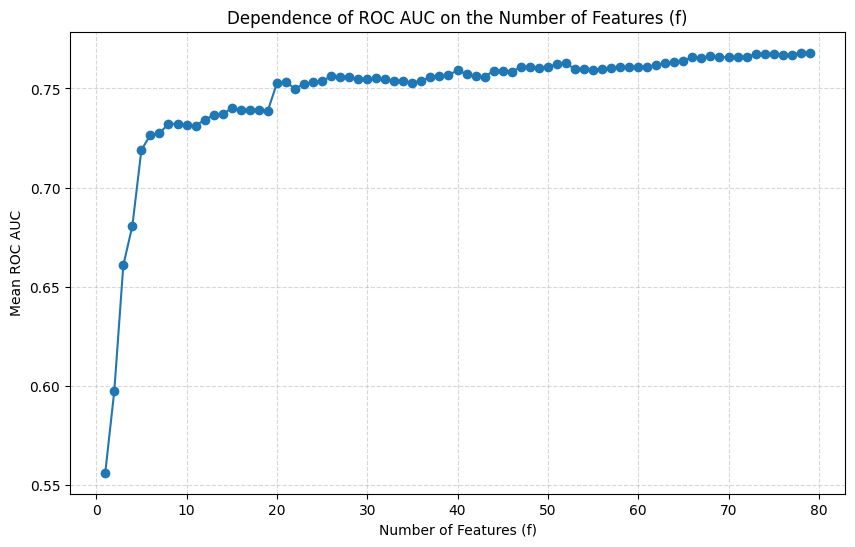

In [37]:
roc_auc_array = np.array(full_roc_auc)
mean_roc_auc = np.mean(roc_auc_array, axis=0)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mean_roc_auc) + 1), mean_roc_auc, marker='o', linestyle='-')
plt.xlabel("Number of Features (f)")
plt.ylabel("Mean ROC AUC")
plt.title("Dependence of ROC AUC on the Number of Features (f)")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

### Отобранный набор признаков

In [19]:
print(feat_rank_list[:160])

['feature_80', 'feature_47', 'feature_421', 'feature_48', 'feature_383', 'feature_424', 'feature_234', 'feature_353', 'feature_244', 'feature_35', 'feature_131', 'feature_11', 'feature_462', 'feature_239', 'feature_98', 'feature_467', 'feature_195', 'feature_100', 'feature_365', 'feature_164', 'feature_166', 'feature_154', 'feature_390', 'feature_230', 'feature_133', 'feature_157', 'feature_439', 'feature_50', 'feature_45', 'feature_332', 'feature_212', 'feature_119', 'feature_153', 'feature_490', 'feature_371', 'feature_81', 'feature_201', 'feature_139', 'feature_452', 'feature_53', 'feature_51', 'feature_42', 'feature_223', 'feature_364', 'feature_197', 'feature_114', 'feature_251', 'feature_87', 'feature_451', 'feature_12', 'feature_470', 'feature_97', 'feature_318', 'feature_325', 'feature_147', 'feature_323', 'feature_86', 'feature_138', 'feature_435', 'feature_68', 'feature_331', 'feature_242', 'feature_9', 'feature_151', 'feature_18', 'feature_412', 'feature_262', 'feature_31', 